In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("put_file_address_here")

**STEP 1:**  Data Understanding and Preprocessing

***Objective:*** Familiarize ourselves with the dataset, identify missing values, and clean the data.

***Tasks:***

1.Load the dataset and examine its structure (columns, data types, and summary statistics).

2.Check for missing values and decide how to handle them.

3.Check for duplicate entries and drop if necessary.

***DATASET INFORMATION:***
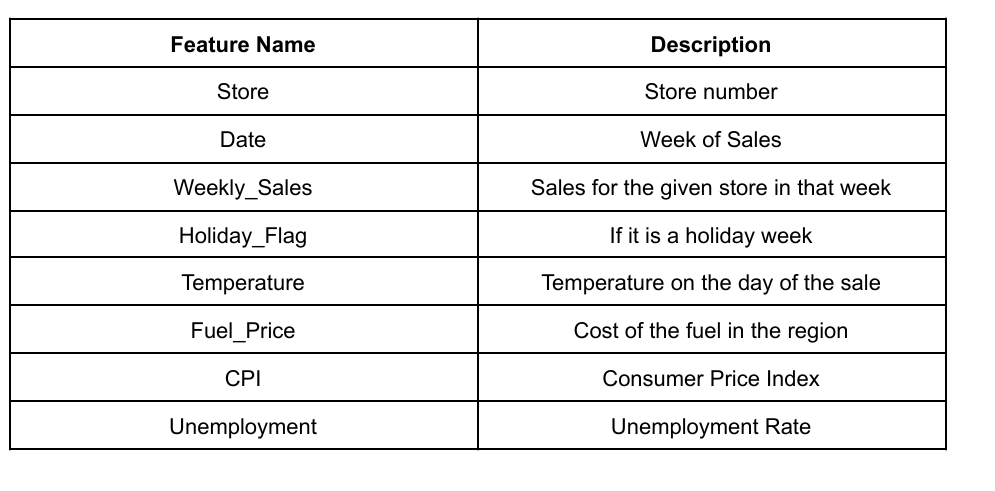

In [9]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [3]:
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


**Observations:**

***Data Types:***


The Date column is an object type. We'll need to convert it to a datetime format for time-series analysis.
Other columns have appropriate data types.


***Missing Values:***

All columns have 6435 non-null values, meaning there are no missing values.


***Summary Statistics:***

Weekly_Sales: The mean is around $1,046,965, with a maximum of $3,818,686 and a minimum of $209,986. There might be outliers based on this wide range.

Holiday_Flag: It's binary (0 or 1), as expected.

Temperature: Ranges from -2.06°F to 100.14°F, which seems reasonable.

Fuel_Price, CPI, Unemployment: Appear to have plausible ranges.

In [5]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [6]:
#Converting Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


In [63]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [7]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

Number of duplicate rows: 0


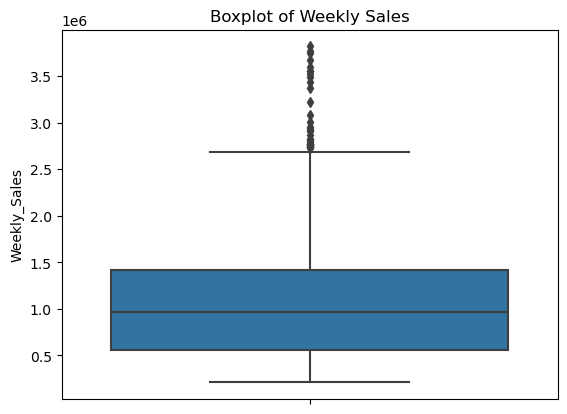

Date range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00


In [17]:
# Checking for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Boxplot to examine outliers in Weekly_Sales
sns.boxplot(data=df, y='Weekly_Sales')
plt.title('Boxplot of Weekly Sales')
plt.show()

# Confirming the time span of the dataset
print("Date range:", df['Date'].min(), "to", df['Date'].max())


In [ ]:
# plotting box plot for each variables for each store:


# List of numerical variables for box plot analysis
numeric_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Gets the unique stores
stores = df['Store'].unique()

# Loop through each store and plot each variable separately as a horizontal box plot
for store in stores:
    store_data = df[df['Store'] == store]  # Filters data for the current store
    for col in numeric_columns:
        plt.figure(figsize=(5, 2))  # Set figure size
        sns.boxplot(data=store_data, x=col, color="skyblue")  # Creates a horizontal box plot
        plt.title(f'Box Plot of {col} for Store {store}', fontsize=14)  # Title
        plt.xlabel(col, fontsize=12)  # Label for the x-axis
        plt.ylabel('Store', fontsize=12)  # Label for the y-axis
        plt.tight_layout()
        plt.show()

Only weekly sales box plots shows presence of outliers in general. so while performing store wise analysis getting rid of outliers by removing/replacing could be a good idea. If the outliers are legitimate (e.g., during holiday weeks or major sales events) and provide meaningful context, replacing them with more typical values can prevent them from skewing the results without losing the information. In our case best way to deal is Winsorization: Cap the outliers at the lower and upper bounds or leave it as it is assuming they are meaningful outliers.

We are creating a new DataFrame, df_cleaned, that is a copy of the original data (df). Then, for specific columns like Weekly_Sales, Temperature, Fuel_Price, CPI, and Unemployment, we identify and replace (Winsorize) any extreme values (outliers) for weekly sales using the IQR method. This ensures that the cleaned data is stored separately while preserving the original data intact.

In [8]:
# Creating a copy of the original DataFrame to preserve the original
df_cleaned = df.copy()

# List of columns to check for outliers
columns_to_check = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Loop through the specified columns and remove outliers
for col in columns_to_check:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Removing outliers in the cleaned DataFrame
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    
    # Print the number of rows remaining after removing outliers for each column
    print(f"Outliers removed for {col}: {len(df_cleaned)} rows remaining")


Outliers removed for Weekly_Sales: 6401 rows remaining
Outliers removed for Temperature: 6398 rows remaining
Outliers removed for Fuel_Price: 6398 rows remaining
Outliers removed for CPI: 6398 rows remaining
Outliers removed for Unemployment: 5917 rows remaining


In [9]:
# Creating a copy of the original DataFrame to preserve the original
df_cleaned_win = df.copy()

# List of columns to check for outliers
columns_to_check = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Loop through the specified columns and apply Winsorization
for col in columns_to_check:
    Q1 = df_cleaned_win[col].quantile(0.25)
    Q3 = df_cleaned_win[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Applying Winsorization (replace outliers with bounds)
    df_cleaned_win[col] = df_cleaned_win[col].clip(lower=lower_bound, upper=upper_bound)
    
    # Print the number of rows in the cleaned DataFrame (no rows are removed)
    print(f"Outliers Winsorized for {col}: {len(df_cleaned_win)} rows remaining")


Outliers Winsorized for Weekly_Sales: 6435 rows remaining
Outliers Winsorized for Temperature: 6435 rows remaining
Outliers Winsorized for Fuel_Price: 6435 rows remaining
Outliers Winsorized for CPI: 6435 rows remaining
Outliers Winsorized for Unemployment: 6435 rows remaining


In [10]:
df_cleaned.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

***For original dataset***

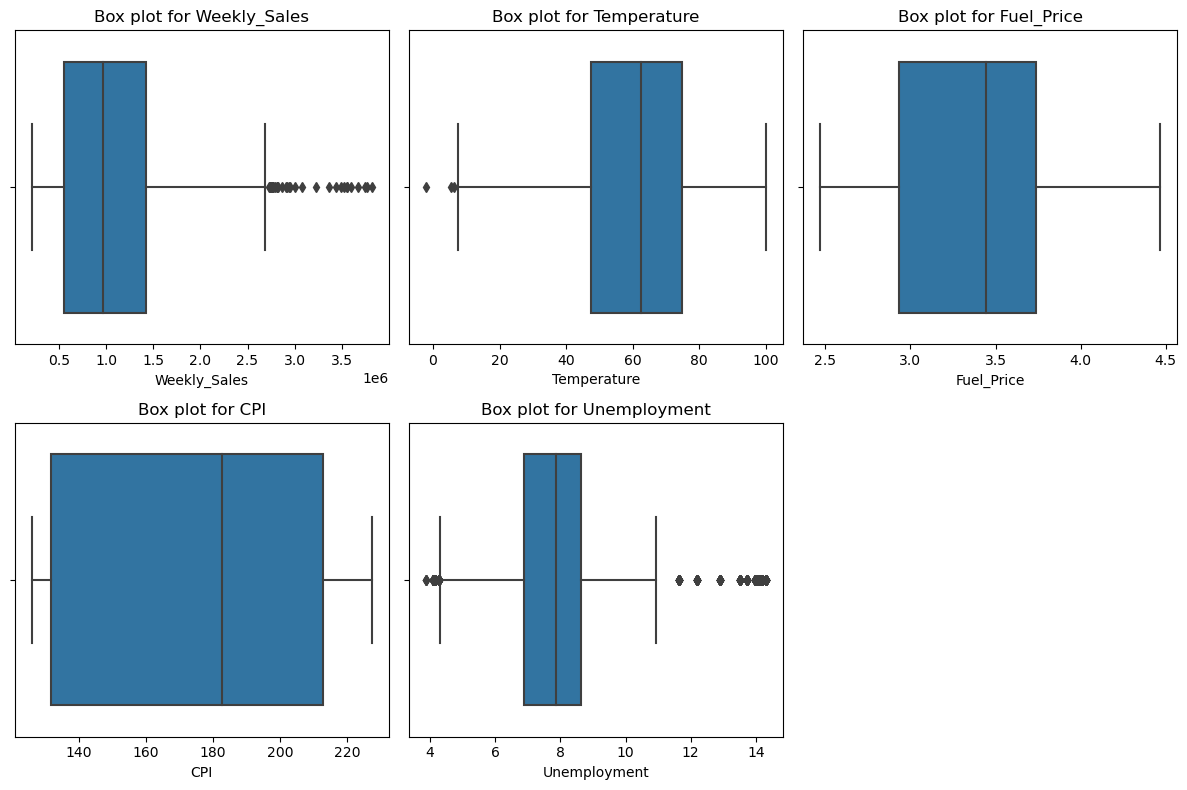

In [21]:
# Set the plot size
plt.figure(figsize=(12, 8))

# List of columns to check for outliers
columns_to_check = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Creating box plots for each column
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])  # Box plot for the original data
    plt.title(f'Box plot for {col}')

plt.tight_layout()
plt.show()

***For dataset after getting rid of outliers***

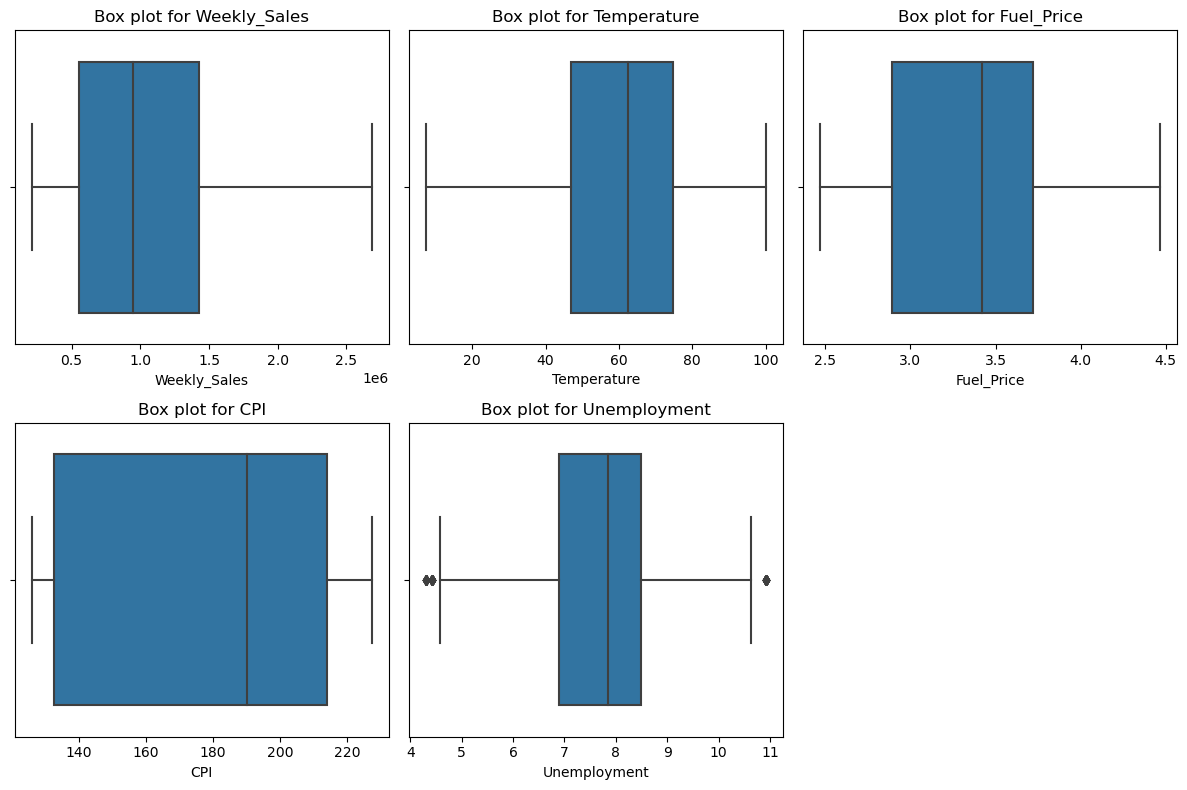

In [22]:
# Set the plot size
plt.figure(figsize=(12, 8))

# List of columns to check for outliers
columns_to_check = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Creat ing box plots for each column
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_cleaned[col])  # Box plot for the cleaned data
    plt.title(f'Box plot for {col}')

plt.tight_layout()
plt.show()

***For winsorized data***

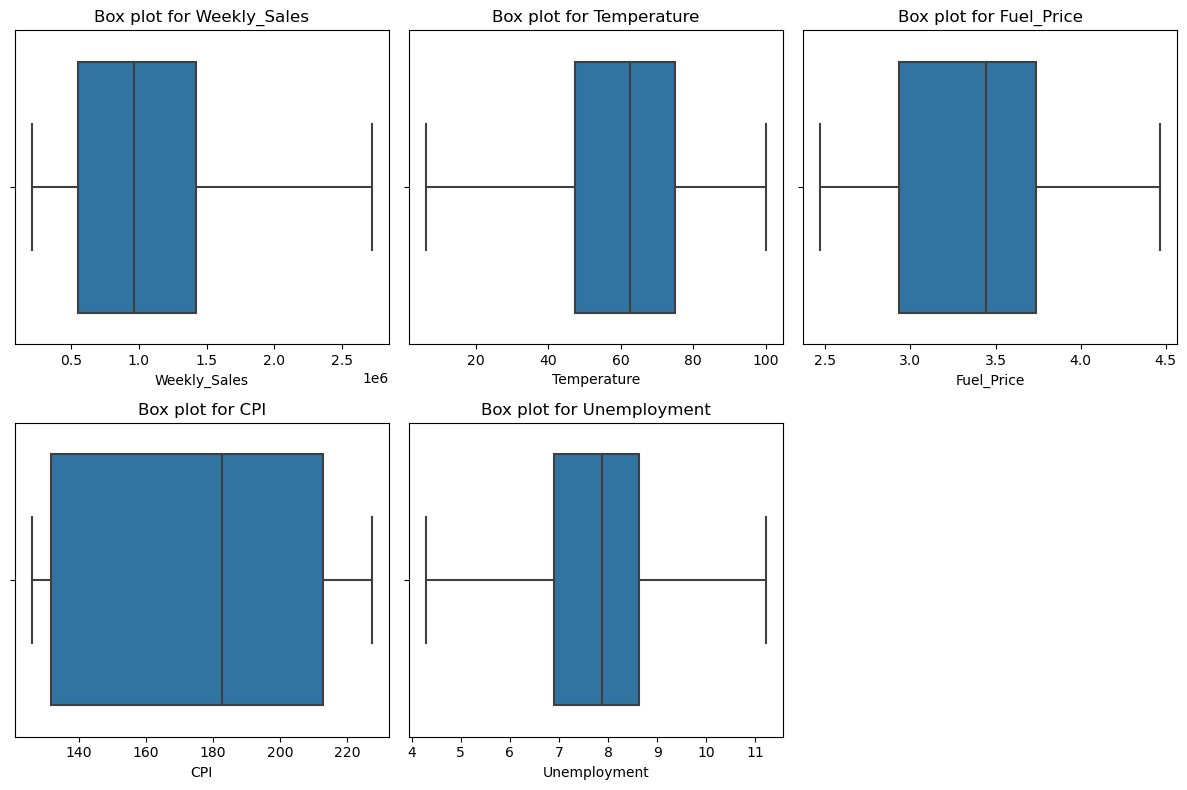

In [23]:

# Set the plot size
plt.figure(figsize=(12, 8))

# List of columns to check for outliers
columns_to_check = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Create box plots for each column
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_cleaned_win[col])  # Box plot for the Winsorized data
    plt.title(f'Box plot for {col}')

plt.tight_layout()
plt.show()

In [24]:
df_cleaned.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [19]:
df_cleaned.duplicated().sum()

0

In [20]:
df_cleaned.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  5917.000000  5.917000e+03   5917.000000  5917.000000  5917.000000   
mean     22.801251  1.039313e+06      0.069123    60.433407     3.340543   
std      13.094060  5.519450e+05      0.253684    18.386455     0.458200   
min       1.000000  2.099862e+05      0.000000     7.460000     2.472000   
25%      11.000000  5.525292e+05      0.000000    46.980000     2.891000   
50%      22.000000  9.472292e+05      0.000000    62.620000     3.420000   
75%      34.000000  1.427624e+06      0.000000    74.730000     3.721000   
max      45.000000  2.685352e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  5917.000000   5917.000000  
mean    175.023148      7.722305  
std      39.023139      1.243337  
min     126.064000      4.308000  
25%     132.767067      6.891000  
50%     190.006988      7.852000  
75%     213.799099      8.494000  
max     227.232807     10.926000

In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5917 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         5917 non-null   int64         
 1   Date          5917 non-null   datetime64[ns]
 2   Weekly_Sales  5917 non-null   float64       
 3   Holiday_Flag  5917 non-null   int64         
 4   Temperature   5917 non-null   float64       
 5   Fuel_Price    5917 non-null   float64       
 6   CPI           5917 non-null   float64       
 7   Unemployment  5917 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 416.0 KB


Cleaned df is free from null values and duplicates and have almost no outliers except for unemployment.

It seems like the Unemployment column has a minimum value of 4.31% and a maximum value of 10.93%, with the 25th percentile at 6.89% and the 75th percentile at 8.49%. The range appears to be somewhat reasonable, but it’s useful to look at the distribution of the data more closely.


Since Unemployment doesn't show extreme outliers based on the statistics, but if you are concerned about any specific values, you can examine the actual data for these extreme values to check if they might be rare cases (such as a regional economic shock or crisis).


Filtering and looking at specific Unemployment values greater than, say, 10%.





In [22]:
# Filter out rows with unemployment greater than 10%
high_unemployment = df_cleaned[df_cleaned['Unemployment'] > 10]

# Display the filtered rows
print(high_unemployment)


      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1699     12 2012-06-07    1014898.78             0        89.13       3.765   
1700     12 2012-07-13     960312.75             0        95.61       3.723   
1701     12 2012-07-20     941550.34             0        85.53       3.726   
1702     12 2012-07-27     916967.92             0        93.47       3.769   
1703     12 2012-03-08     958667.23             0        88.16       3.760   
...     ...        ...           ...           ...          ...         ...   
6101     43 2011-02-12     585028.26             0        47.49       3.172   
6102     43 2011-09-12     617898.07             0        34.23       3.158   
6103     43 2011-12-16     665007.08             0        43.78       3.159   
6104     43 2011-12-23     676290.46             0        42.63       3.112   
6105     43 2011-12-30     505405.85             1        41.83       3.129   

             CPI  Unemployment  
1699  130.719633  

The filtered output shows that there are 251 rows with Unemployment values greater than 10%. These seem to be specific instances where unemployment is unusually high, but they are not extreme outliers (e.g., they are around 10.9%).


Next steps:

Consider if these are genuine cases:


These high unemployment values might represent certain periods or regions where unemployment spikes temporarily. For instance, economic events like layoffs or factory shutdowns could contribute to such numbers.
Options for handling:


Leave them: If these high unemployment rates are legitimate and represent real-world situations (e.g., economic recessions), you could leave them in the data.

Cap them: If you feel they are extreme but not necessary for the analysis, you can cap the unemployment values at 10%.

Remove them: If they seem to be erroneous or irrelevant, you can drop these rows.

We prefer to leave it as it is.

**DATASET TO REPRESENT OVERALL SENARIO :** We are proceeding with the dataframe where we used Winsorization: Cap the outliers at the lower and upper bounds; for outlier problem as it is more suitable in our usecase.

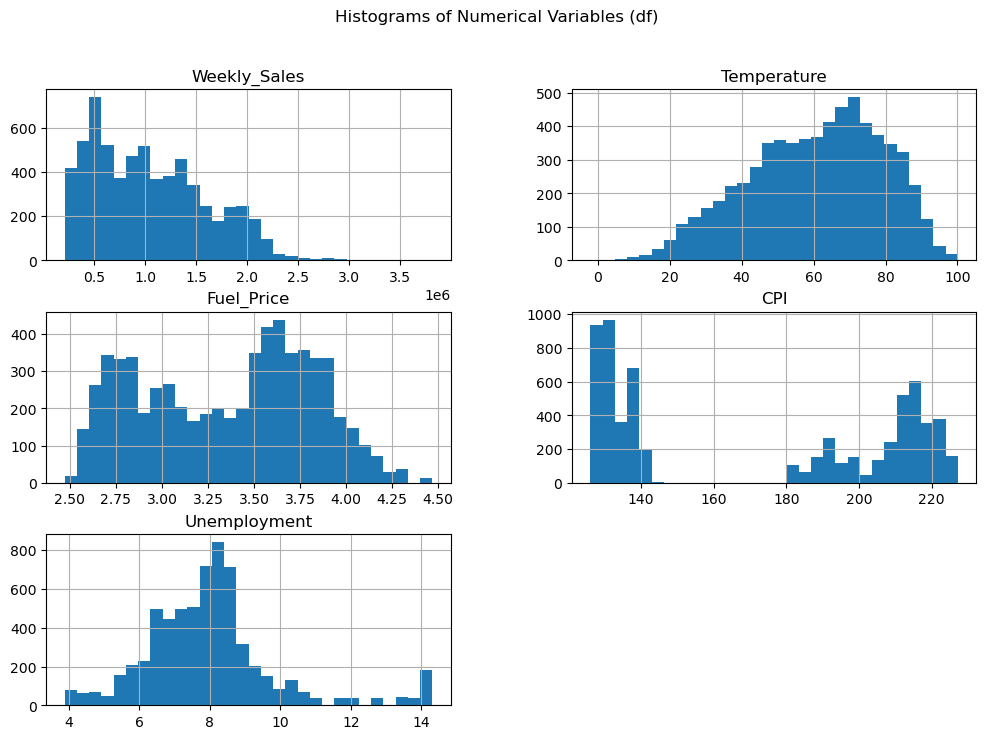

In [25]:
# Descriptive statistics
df.describe()

# Plotting histograms for numerical variables
numerical_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
df[numerical_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle('Histograms of Numerical Variables (df)')
plt.show()


In [18]:
# giving df_cleaned_win to df_clean for it easier to work with:
df_clean = df_cleaned_win

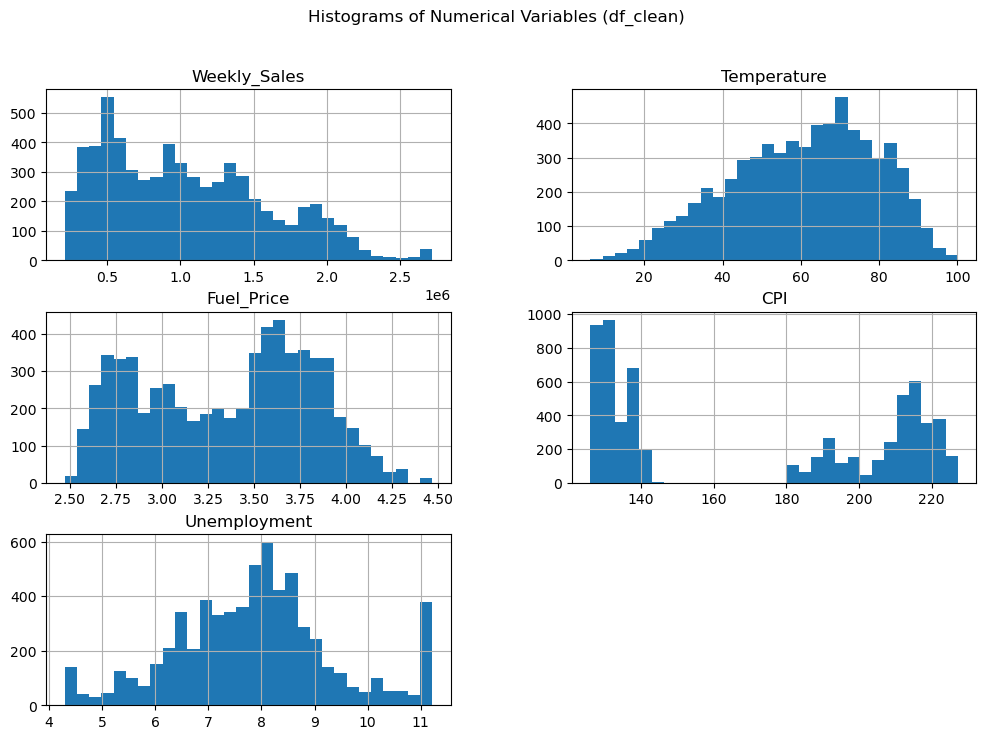

In [19]:
# Descriptive statistics
df_clean.describe()

# Plotting histograms for numerical variables
numerical_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
df_clean[numerical_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle('Histograms of Numerical Variables (df_clean)')
plt.show()

In [75]:
import statsmodels.api as sm
# Selecting independent variables (features) and dependent variable (target)
X = df_clean[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag']]
y = df_clean['Weekly_Sales']
# Adding a constant to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     33.46
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           7.64e-34
Time:                        02:19:26   Log-Likelihood:                -94188.
No. Observations:                6435   AIC:                         1.884e+05
Df Residuals:                    6429   BIC:                         1.884e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.779e+06   8.26e+04     21.519   

In [76]:


for i in df_clean['Store'].unique():
    print(f"Store {i}")
    # Selecting independent variables (features) and dependent variable (target)
    X = df_clean[df_clean['Store'] == i][['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
    y = df_clean[df_clean['Store'] == i]['Weekly_Sales']

    # Adding a constant to the independent variables (required for statsmodels)
    X = sm.add_constant(X)

    # Fit the linear regression model
    model = sm.OLS(y, X).fit()

    # Print the summary of the regression results
    print(model.summary())
    print('--------------------------------------------------------------------------------------------------------------------')




Store 1
                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     5.114
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           0.000714
Time:                        02:20:23   Log-Likelihood:                -1902.4
No. Observations:                 143   AIC:                             3815.
Df Residuals:                     138   BIC:                             3830.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.727e+06   1.76e+06     -

In [36]:
for i in df['Store'].unique():
    print(f"Store {i}")
    print(df[df['Store'] == i].describe())
    print('--------------------------------------------------------------------------------------------------------------------')


Store 1
       Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
count  143.0  1.430000e+02    143.000000   143.000000  143.000000  143.000000   
mean     1.0  1.555264e+06      0.069930    68.306783    3.219699  215.996892   
std      0.0  1.559808e+05      0.255926    14.250486    0.427313    4.350890   
min      1.0  1.316899e+06      0.000000    35.400000    2.514000  210.337426   
25%      1.0  1.458105e+06      0.000000    58.265000    2.764500  211.549277   
50%      1.0  1.534850e+06      0.000000    69.640000    3.290000  215.459905   
75%      1.0  1.614892e+06      0.000000    80.485000    3.594000  220.531330   
max      1.0  2.387950e+06      1.000000    91.650000    3.907000  223.444251   

       Unemployment  
count    143.000000  
mean       7.610420  
std        0.383749  
min        6.573000  
25%        7.348000  
50%        7.787000  
75%        7.838000  
max        8.106000  
----------------------------------------------------------------

In [37]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Display the correlation of Weekly Sales with other factors
print(correlation_matrix['Weekly_Sales'].sort_values(ascending=False))


Weekly_Sales    1.000000
Holiday_Flag    0.036891
Fuel_Price      0.009464
Temperature    -0.063810
CPI            -0.072634
Unemployment   -0.106176
Store          -0.335332
Name: Weekly_Sales, dtype: float64


C:\Users\chait\AppData\Local\Temp\ipykernel_24036\1710687803.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [20]:
# Calculating the correlation matrix with wisorized data.
correlation_matrix = df_clean.corr()

# Display the correlation of Weekly Sales with other factors
print(correlation_matrix['Weekly_Sales'].sort_values(ascending=False))

Weekly_Sales    1.000000
Holiday_Flag    0.036703
Fuel_Price      0.010998
Temperature    -0.060808
CPI            -0.072627
Unemployment   -0.108662
Store          -0.336559
Name: Weekly_Sales, dtype: float64


C:\Users\chait\AppData\Local\Temp\ipykernel_24628\778398358.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_clean.corr()


Not much of a difference between df and df_clean results.


C:\Users\chait\AppData\Local\Temp\ipykernel_24628\3718306117.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


<Axes: >

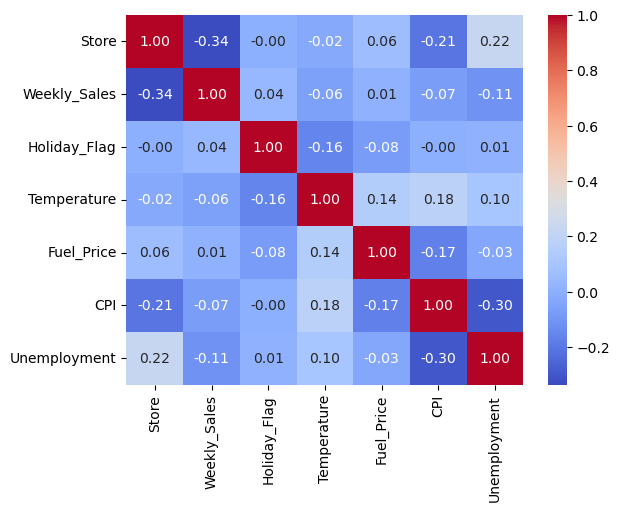

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

Store
1    -0.097955
2     0.066325
3    -0.230413
4    -0.337015
5    -0.207043
6     0.044251
7    -0.165382
8    -0.052580
9    -0.191534
10    0.131908
11   -0.020339
12   -0.009286
13   -0.171633
14    0.210786
15    0.078905
16   -0.070864
17   -0.263600
18    0.139179
19    0.101464
20   -0.095341
21    0.218367
22    0.039043
23   -0.077169
24   -0.012261
25   -0.004958
26   -0.066899
27   -0.014275
28    0.136671
29    0.084682
30    0.201862
31   -0.064738
32   -0.099455
33    0.101175
34    0.017010
35    0.483865
36    0.833734
37   -0.221287
38   -0.785290
39   -0.384681
40   -0.112528
41   -0.350630
42   -0.356355
43   -0.201954
44   -0.780076
45   -0.004041
dtype: float64
Stores most affected by unemployment:
 Store
38   -0.785290
44   -0.780076
dtype: float64


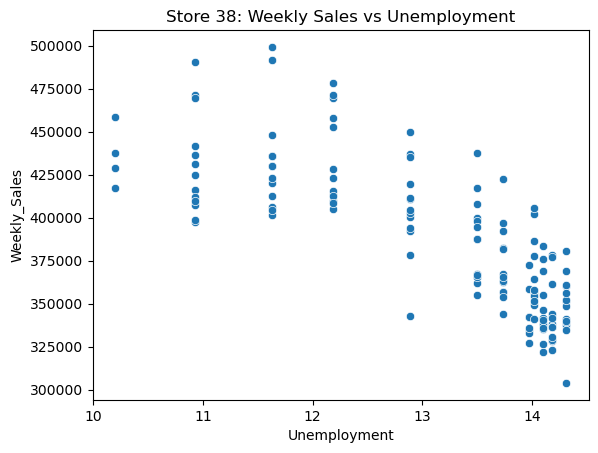

In [33]:
# Correlation between Weekly_Sales and Unemployment for each store
correlation = df.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['Unemployment']))
print(correlation)

# Identifying stores suffering the most
worst_affected_stores = correlation[correlation < -0.5]
print("Stores most affected by unemployment:\n", worst_affected_stores)

# Scatter plot for an example store
example_store = worst_affected_stores.index[0]
store_data = df[df['Store'] == example_store]
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=store_data)
plt.title(f'Store {example_store}: Weekly Sales vs Unemployment')
plt.show()


Store
1    -0.097955
2     0.064159
3    -0.230413
4    -0.455947
5    -0.207043
6     0.044128
7    -0.165382
8    -0.052580
9    -0.191534
10    0.161782
11   -0.020339
12    0.098471
13   -0.234810
14    0.250873
15    0.078905
16   -0.070864
17   -0.263600
18    0.139179
19    0.101464
20   -0.108839
21    0.218367
22    0.039043
23   -0.078912
24   -0.012261
25   -0.004958
26   -0.066899
27   -0.016031
28    0.126468
29    0.084682
30    0.201862
31   -0.064738
32   -0.099455
33    0.101175
34    0.017010
35    0.483865
36    0.833734
37   -0.221287
38   -0.335249
39   -0.384681
40   -0.114802
41   -0.350630
42   -0.356355
43   -0.201954
44   -0.780076
45   -0.004041
dtype: float64
Stores most affected by unemployment:
 Store
44   -0.780076
dtype: float64


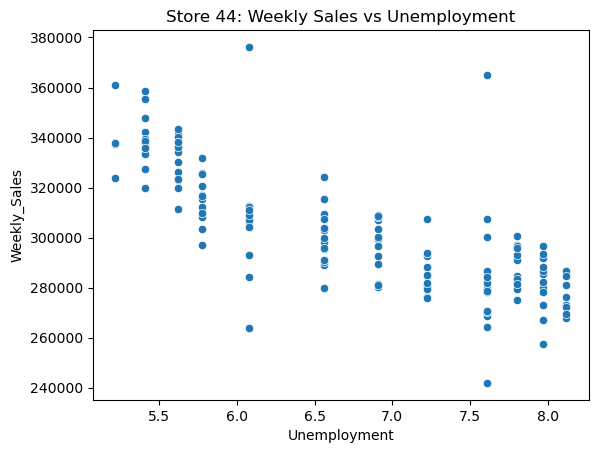

In [39]:
# Correlation between Weekly_Sales and Unemployment for each store (for winsorized data)
correlation = df_clean.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['Unemployment']))
print(correlation)

# Identifying stores suffering the most
worst_affected_stores = correlation[correlation < -0.5]
print("Stores most affected by unemployment:\n", worst_affected_stores)

# Scatter plot for an example store
example_store = worst_affected_stores.index[0]
store_data = df_clean[df_clean['Store'] == example_store]
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=store_data)
plt.title(f'Store {example_store}: Weekly Sales vs Unemployment')
plt.show()

difference in results for df and df_clean 

In [45]:
df[df['Store'] == 38].describe()

Store   Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
count  143.0     143.000000    143.000000   143.000000  143.000000   
mean    38.0  385731.653287      0.069930    70.262797    3.606420   
std      0.0   42768.169450      0.255926    16.630317    0.447926   
min     38.0  303908.810000      0.000000    37.640000    2.825000   
25%     38.0  350365.655000      0.000000    53.985000    3.125000   
50%     38.0  380870.090000      0.000000    68.660000    3.705000   
75%     38.0  414198.140000      0.000000    85.425000    3.966000   
max     38.0  499267.660000      1.000000    99.220000    4.468000   

              CPI  Unemployment  
count  143.000000    143.000000  
mean   128.679669     13.116483  
std      1.858300      1.208114  
min    126.064000     10.199000  
25%    126.590094     12.187000  
50%    129.075677     13.736000  
75%    130.502414     14.099000  
max    131.193097     14.313000

In [48]:
df[(df['Store'] == 38) & (df['Unemployment'] > 13)]

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
5291     38 2010-05-02     358496.14             0        49.47       2.962   
5292     38 2010-12-02     342214.90             1        47.87       2.946   
5293     38 2010-02-19     327237.92             0        54.83       2.915   
5294     38 2010-02-26     334222.73             0        50.23       2.825   
5295     38 2010-05-03     372239.89             0        53.77       2.987   
...     ...        ...           ...           ...          ...         ...   
5373     38 2011-02-09     416953.51             0        93.66       3.798   
5374     38 2011-09-09     397771.68             1        88.00       3.913   
5375     38 2011-09-16     408188.88             0        76.36       3.918   
5376     38 2011-09-23     394665.28             0        82.95       3.789   
5377     38 2011-09-30     366819.84             0        83.26       3.877   

             CPI  Unemployment  
5291  126.442065        13.975  
5292  126.496258        13.975  
5293  126.526286        13.975  
5294  126.552286        13.975  
5295  126.578286        13.975  
...          ...           ...  
5373  129.325936        13.503  
5374  129.368613        13.503  
5375  129.430600        13.503  
5376  129.518333        13.503  
5377  129.606067        13.503  

[87 rows x 8 columns]

In [46]:
df_clean[df_clean['Store'] == 38].describe()

Store   Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
count  143.0     143.000000    143.000000   143.000000  143.000000   
mean    38.0  385731.653287      0.069930    70.262797    3.606420   
std      0.0   42768.169450      0.255926    16.630317    0.447926   
min     38.0  303908.810000      0.000000    37.640000    2.825000   
25%     38.0  350365.655000      0.000000    53.985000    3.125000   
50%     38.0  380870.090000      0.000000    68.660000    3.705000   
75%     38.0  414198.140000      0.000000    85.425000    3.966000   
max     38.0  499267.660000      1.000000    99.220000    4.468000   

              CPI  Unemployment  
count  143.000000    143.000000  
mean   128.679669     11.163392  
std      1.858300      0.184533  
min    126.064000     10.199000  
25%    126.590094     11.218500  
50%    129.075677     11.218500  
75%    130.502414     11.218500  
max    131.193097     11.218500

In [50]:
df_clean[(df_clean['Store'] == 38) & (df_clean['Unemployment'] > 10)]

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
5291     38 2010-05-02     358496.14             0        49.47       2.962   
5292     38 2010-12-02     342214.90             1        47.87       2.946   
5293     38 2010-02-19     327237.92             0        54.83       2.915   
5294     38 2010-02-26     334222.73             0        50.23       2.825   
5295     38 2010-05-03     372239.89             0        53.77       2.987   
...     ...        ...           ...           ...          ...         ...   
5429     38 2012-09-28     398468.08             0        81.22       3.966   
5430     38 2012-05-10     458479.01             0        81.61       3.966   
5431     38 2012-12-10     437320.66             0        71.74       4.468   
5432     38 2012-10-19     428806.46             0        68.66       4.449   
5433     38 2012-10-26     417290.38             0        65.95       4.301   

             CPI  Unemployment  
5291  126.442065       11.2185  
5292  126.496258       11.2185  
5293  126.526286       11.2185  
5294  126.552286       11.2185  
5295  126.578286       11.2185  
...          ...           ...  
5429  131.043000       10.9260  
5430  131.075667       10.1990  
5431  131.108333       10.1990  
5432  131.149968       10.1990  
5433  131.193097       10.1990  

[143 rows x 8 columns]

On analysing this case for further action it would not be a good idea to winsorise any feature other than sales, as other columns does not contain big outliers and they carry qualitative information with them.

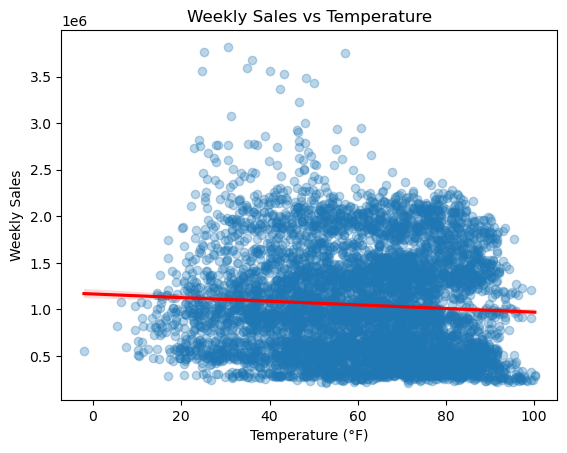

Correlation between Weekly Sales and Temperature: -0.0638100131794696


In [43]:
# Scatter plot with regression line
sns.regplot(x='Temperature', y='Weekly_Sales', data=df, scatter_kws={'alpha': 0.3},line_kws={'color': 'red'})
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales')
plt.show()

# Correlation
correlation_temp = df['Weekly_Sales'].corr(df['Temperature'])
print(f'Correlation between Weekly Sales and Temperature: {correlation_temp}')


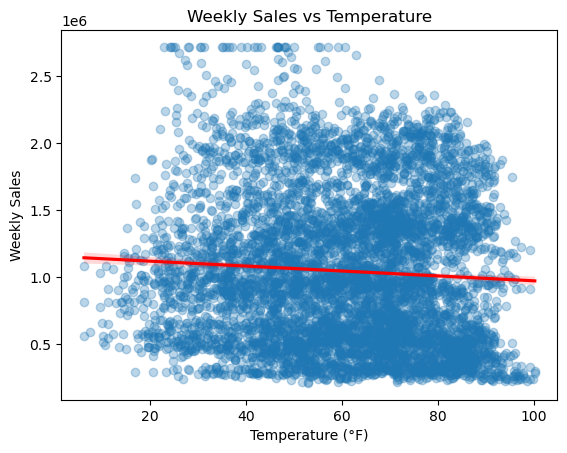

Correlation between Weekly Sales and Temperature: -0.060808275734809195


In [42]:
# Scatter plot with regression line (for winsorized data)
sns.regplot(x='Temperature', y='Weekly_Sales', data=df_clean, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales')
plt.show()

# Correlation
correlation_temp = df_clean['Weekly_Sales'].corr(df_clean['Temperature'])
print(f'Correlation between Weekly Sales and Temperature: {correlation_temp}')

very similar results for both datasets

Correlation between Weekly Sales and CPI for each store:
 Store
1     0.225408
2    -0.062431
3     0.317250
4     0.351157
5     0.308261
6    -0.011357
7     0.289044
8     0.120255
9     0.294805
10   -0.115374
11    0.069781
12    0.084087
13    0.163976
14   -0.419755
15   -0.174467
16    0.124285
17    0.348571
18   -0.193541
19   -0.155341
20    0.058706
21   -0.163649
22   -0.038602
23    0.084248
24   -0.013684
25   -0.010914
26    0.131980
27   -0.213082
28   -0.095908
29   -0.072530
30   -0.298188
31    0.132887
32    0.196782
33   -0.052271
34    0.115437
35   -0.424107
36   -0.915095
37    0.244507
38    0.812837
39    0.428043
40    0.113318
41    0.392293
42    0.360859
43   -0.285686
44    0.740150
45   -0.023548
dtype: float64


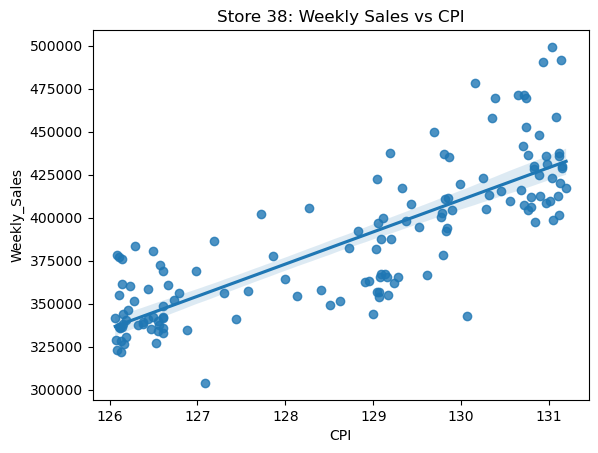

Highest +ve corr between Weekly_Sales and CPI 38: 0.8128368242188552
HIghest -ve between Weekly_Sales and CPI 36: -0.9150952776725552


In [15]:
# Correlation for each store
cpi_correlation = df.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['CPI']))
print("Correlation between Weekly Sales and CPI for each store:\n", cpi_correlation)

# Visualizing for a specific store
example_store = cpi_correlation.idxmax()  # Store with highest correlation
example_store_2 = cpi_correlation.idxmin()  # Store with lowest correlation
store_data = df[df['Store'] == example_store]
sns.regplot(x='CPI', y='Weekly_Sales', data=store_data)
plt.title(f'Store {example_store}: Weekly Sales vs CPI')
plt.show()
print(f"Highest +ve corr between Weekly_Sales and CPI {example_store}: {cpi_correlation[example_store]}")
print(f"HIghest -ve between Weekly_Sales and CPI {example_store_2}: {cpi_correlation[example_store_2]}")

Correlation between Weekly Sales and CPI for each store:
 Store
1     0.225408
2    -0.063428
3     0.317250
4     0.467196
5     0.308261
6    -0.011120
7     0.289044
8     0.120255
9     0.294805
10   -0.135322
11    0.069781
12    0.084087
13    0.225519
14   -0.482162
15   -0.174467
16    0.124285
17    0.348571
18   -0.193541
19   -0.155341
20    0.097201
21   -0.163649
22   -0.038602
23    0.084813
24   -0.013684
25   -0.010914
26    0.131980
27   -0.214354
28   -0.095908
29   -0.072530
30   -0.298188
31    0.132887
32    0.196782
33   -0.052271
34    0.115437
35   -0.424107
36   -0.915095
37    0.244507
38    0.812837
39    0.428043
40    0.113318
41    0.392293
42    0.360859
43   -0.285686
44    0.740150
45   -0.023548
dtype: float64


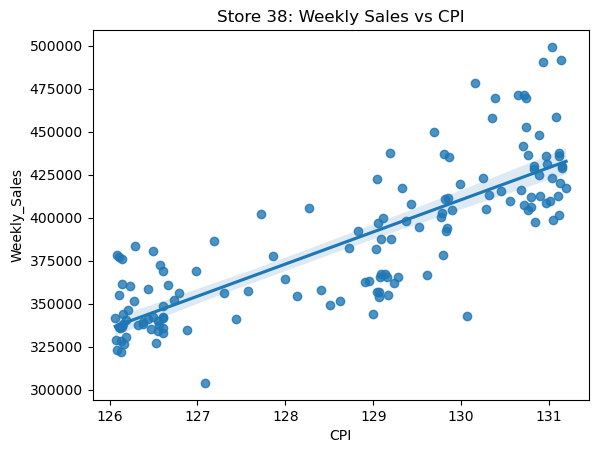

Highest +ve corr between Weekly_Sales and CPI 38: 0.8128368242188552
HIghest -ve between Weekly_Sales and CPI 36: -0.9150952776725552


In [22]:
# Correlation for each store (for winsorized data)
cpi_correlation = df_clean.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['CPI']))
print("Correlation between Weekly Sales and CPI for each store:\n", cpi_correlation)

# Visualizing for a specific store
example_store = cpi_correlation.idxmax()  # Store with highest correlation
example_store_2 = cpi_correlation.idxmin()  # Store with lowest correlation
store_data = df_clean[df_clean['Store'] == example_store]
sns.regplot(x='CPI', y='Weekly_Sales', data=store_data)
plt.title(f'Store {example_store}: Weekly Sales vs CPI')
plt.show()
print(f"Highest +ve corr between Weekly_Sales and CPI {example_store}: {cpi_correlation[example_store]}")
print(f"HIghest -ve between Weekly_Sales and CPI {example_store_2}: {cpi_correlation[example_store_2]}")

very similar results

Top Performing Stores:
 Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


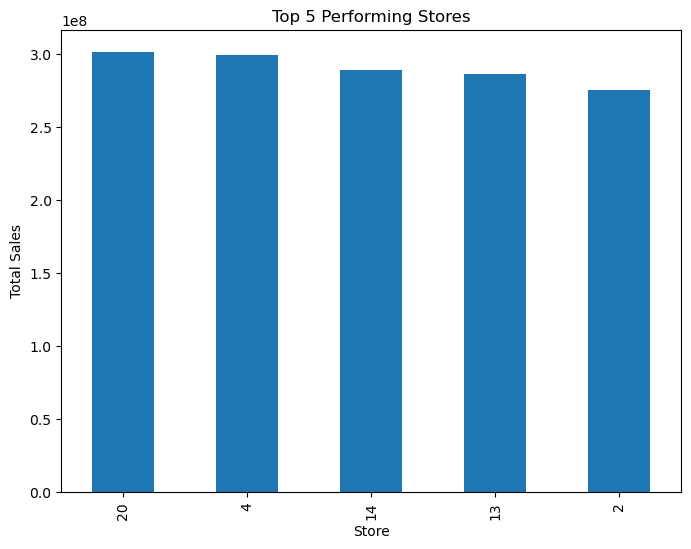

In [36]:
# Total sales by store
total_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print("Top Performing Stores:\n", total_sales.head())

# Bar plot for top 5 stores
total_sales.head(5).plot(kind='bar', figsize=(8, 6))
plt.title('Top 5 Performing Stores')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()


Worst Performing Store: 33
Sales of Worst Store: 37160221.96
Difference between highest and lowest sales: 264237570.49999997


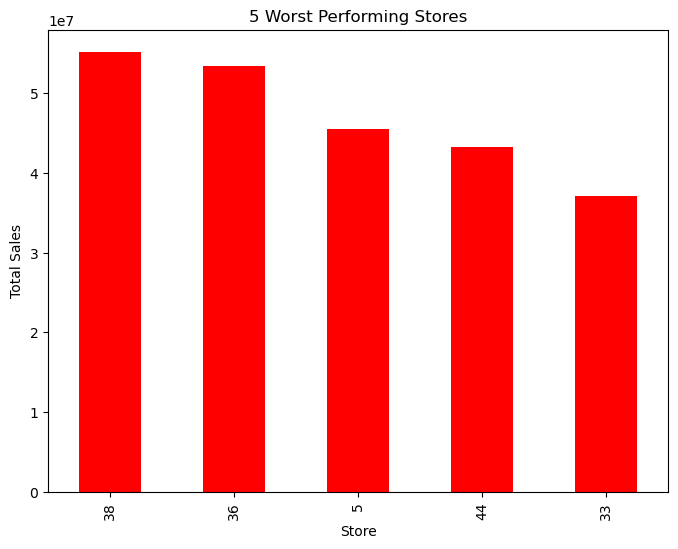

In [37]:
# Identify worst-performing store
worst_store = total_sales.idxmin()
print(f'Worst Performing Store: {worst_store}')
print(f'Sales of Worst Store: {total_sales[worst_store]}')

# Difference between highest and lowest-performing stores
sales_diff = total_sales.max() - total_sales.min()
print(f'Difference between highest and lowest sales: {sales_diff}')

# Visualization
total_sales.tail(5).plot(kind='bar', figsize=(8, 6), color='red')
plt.title('5 Worst Performing Stores')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()


In [52]:
# Group by Store and calculate total sales
store_performance = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Sort the stores by total sales in descending order
top_performing_stores = store_performance.sort_values(by='Weekly_Sales', ascending=False)

# Display top 5 performing stores
print("Top Performing Stores:")
print(top_performing_stores.head())

# Display lowest 5 performing stores
print("\nLowest Performing Stores:")
print(top_performing_stores.tail())


Top Performing Stores:
    Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08

Lowest Performing Stores:
    Store  Weekly_Sales
37     38   55159626.42
35     36   53412214.97
4       5   45475688.90
43     44   43293087.84
32     33   37160221.96


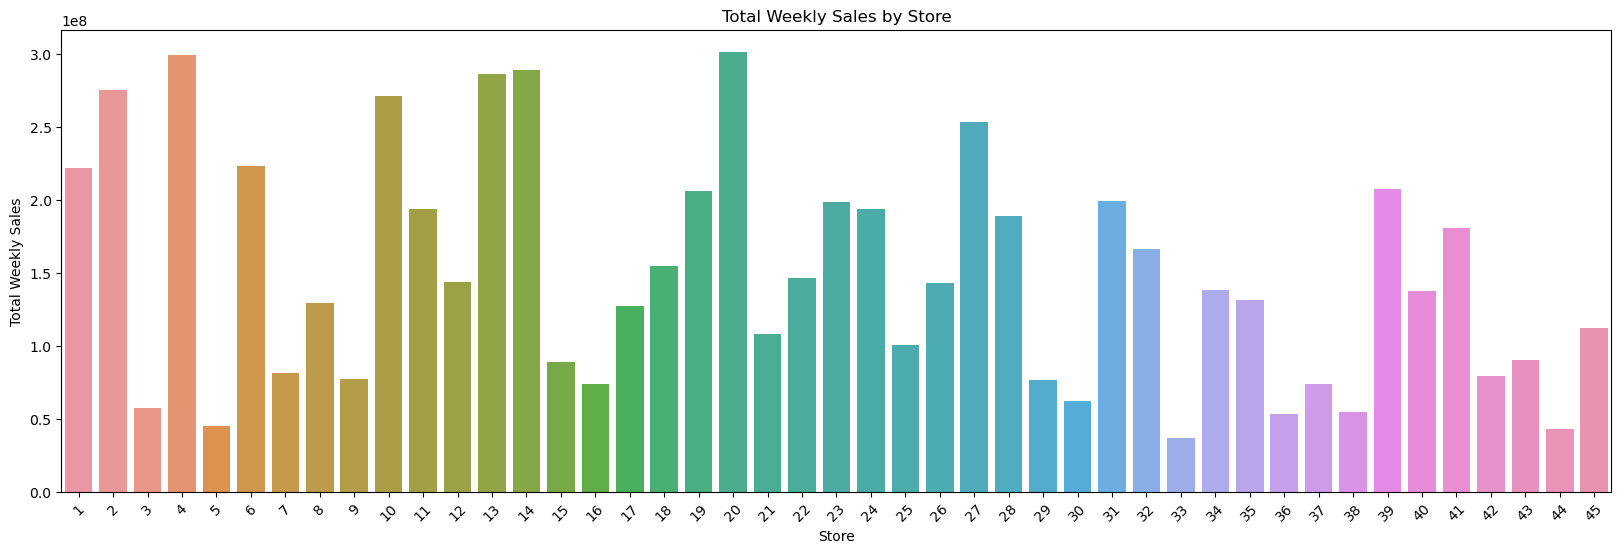

In [53]:
plt.figure(figsize=(20,6))
sns.barplot(x='Store', y='Weekly_Sales', data=top_performing_stores)
plt.title('Total Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=45)
plt.show()

Objective: Visualize how weekly sales change over time to identify trends, patterns, or anomalies.

Steps:

We're creating a line plot with the Date column (used as the index) on the x-axis and Weekly_Sales on the y-axis.

We're setting the plot size to make it easier to read.

We add labels, a title, and a legend for better understanding.

A light grid is included for better visualization of the data points.

This plot will give us a clear picture of overall weekly sales trends over time. It'll help identify peaks, dips, or seasonal changes.

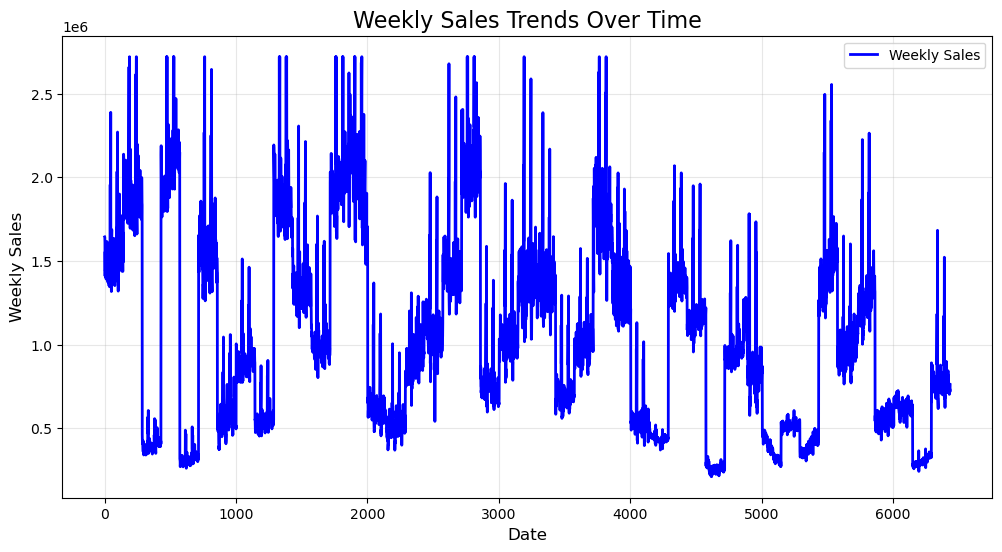

In [56]:
# Line plot for overall weekly sales trends using df_cleaned
plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['Weekly_Sales'], label='Weekly Sales', color='blue', linewidth=2)
plt.title('Weekly Sales Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

Aggregate Data:

Combine weekly sales across all stores to get a single trend line. This will give an overall view of how sales are performing over time.
Example: df_cleaned.groupby('Date')['Weekly_Sales'].sum().

Plot Individual Stores:

Select a subset of stores (e.g., top-performing stores or randomly chosen ones) and plot their sales trends separately.
Example: Filter for Store 1 and plot only its sales trend.

In [29]:
#Creating aggregate data for weekly sales.
#Keeping only dates and weekly sales in it.
df_agg = df_clean.groupby('Date')['Weekly_Sales'].sum().reset_index()

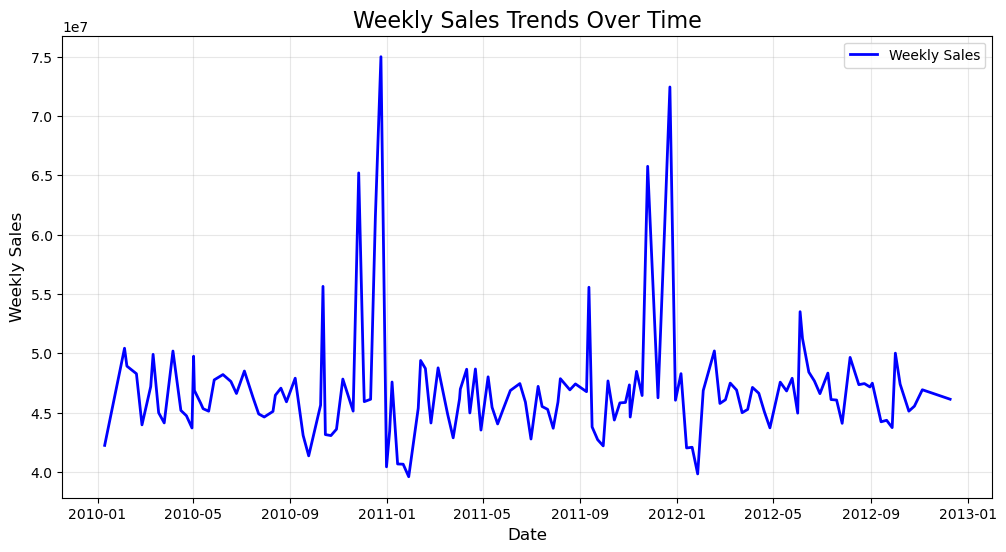

In [54]:
#Plotting the aggregate weekly sales data (line plot):
plt.figure(figsize=(12, 6))
plt.plot(df_agg['Date'], df_agg['Weekly_Sales'], label='Weekly Sales', color='blue', linewidth=2)
plt.title('Weekly Sales Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [ ]:
# Line plot for overall weekly sales trends using df_cleaned for nth store
n = int(input("Enter the store number: "))
df_nth_store = df_clean[df_clean['Store'] == n]
plt.figure(figsize=(12, 6))
plt.plot(df_nth_store.index, df_nth_store['Weekly_Sales'], label='Weekly Sales', color='blue', linewidth=2)
plt.title(f'Weekly Sales Trends Over Time for Store {n}', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()


**we can observe:**


***Seasonal Spikes***: Noticeable peaks around specific times of the year, likely corresponding to holiday seasons or special events.

***Downturns***: There are periods with sharp drops in sales, which might coincide with post-holiday slumps or external economic factors.

***General Trend***: The overall sales seem to hover around a similar range but show fluctuations likely tied to seasonality.

<Figure size 640x480 with 0 Axes>

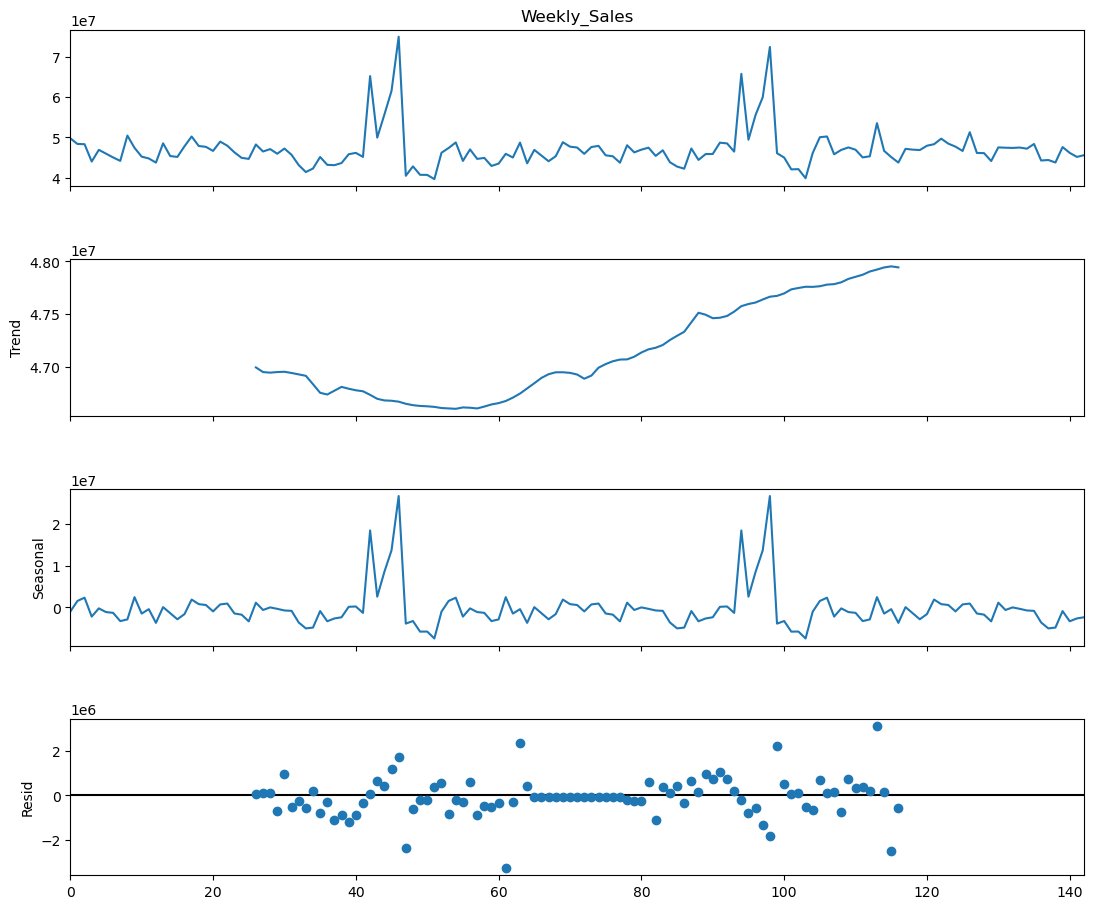

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_agg.Weekly_Sales, period=52)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

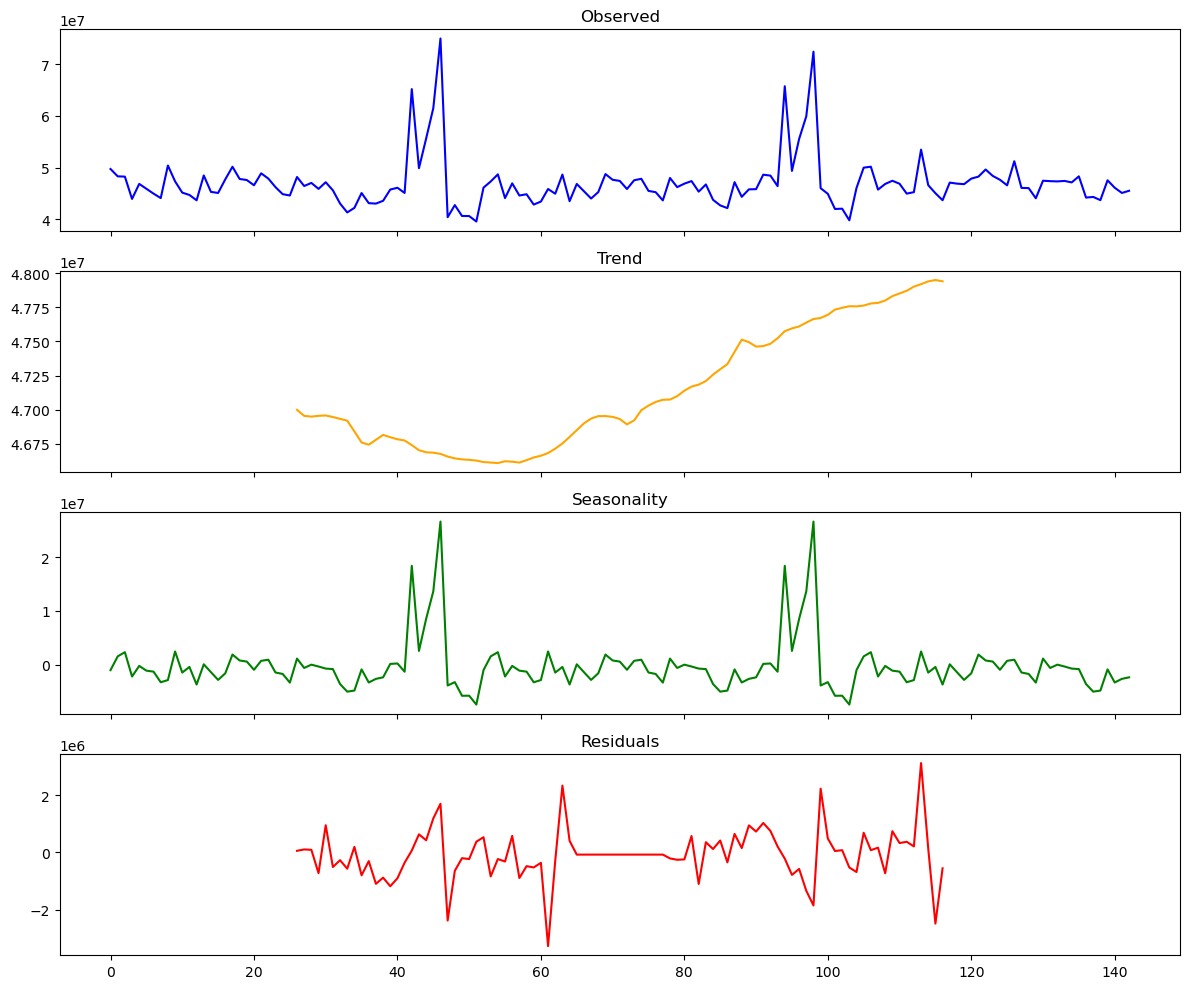

In [31]:
# Performing decomposition
decomposition = seasonal_decompose(df_agg['Weekly_Sales'], model='additive', period=52)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Original Data
ax1.plot(decomposition.observed, label='Observed', color='blue')
ax1.set_title('Observed')

# Trend Component
ax2.plot(decomposition.trend, label='Trend', color='orange')
ax2.set_title('Trend')

# Seasonal Component
ax3.plot(decomposition.seasonal, label='Seasonal', color='green')
ax3.set_title('Seasonality')

# Residual Component
ax4.plot(decomposition.resid, label='Residuals', color='red')
ax4.set_title('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

In [32]:
df_agg['Date'] 

0     2010-02-05
1     2010-02-12
2     2010-02-19
3     2010-02-26
4     2010-03-05
         ...    
138   2012-09-28
139   2012-10-05
140   2012-10-12
141   2012-10-19
142   2012-10-26
Name: Date, Length: 143, dtype: datetime64[ns]

In [66]:
#checking for gaps in the dates
date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='W-FRI')
missing_dates = date_range.difference(df['Date'])
print("Missing Dates:", missing_dates)


Missing Dates: DatetimeIndex(['2010-01-15', '2010-01-22', '2010-01-29', '2010-02-05',
               '2010-02-12', '2010-03-05', '2010-04-02', '2010-04-09',
               '2010-05-07', '2010-06-04', '2010-06-11', '2010-07-02',
               '2010-07-09', '2010-08-06', '2010-09-03', '2010-09-10',
               '2010-10-01', '2010-10-08', '2010-11-05', '2010-11-12',
               '2010-12-10', '2011-02-04', '2011-02-11', '2011-03-04',
               '2011-03-11', '2011-04-01', '2011-04-08', '2011-05-06',
               '2011-06-03', '2011-06-10', '2011-07-08', '2011-08-05',
               '2011-08-12', '2011-09-02', '2011-10-07', '2011-11-04',
               '2011-12-02', '2011-12-09', '2012-02-10', '2012-03-09',
               '2012-04-06', '2012-05-04', '2012-05-11', '2012-06-08',
               '2012-07-06', '2012-08-03', '2012-08-10', '2012-09-07',
               '2012-10-05', '2012-10-12', '2012-11-02', '2012-11-09',
               '2012-11-16', '2012-11-23', '2012-11-30', '2012

In [33]:
#Extracting components like month or week:
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Year'] = df['Date'].dt.year


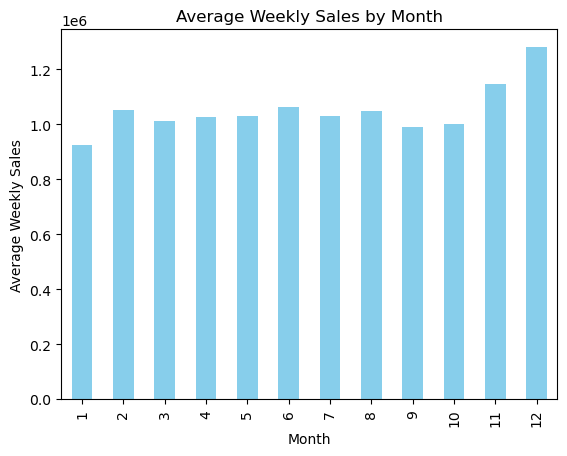

In [34]:
#Plot trends over time to see patterns (e.g., sales spikes around holidays or specific months).
# Grouping by month for seasonality analysis
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()

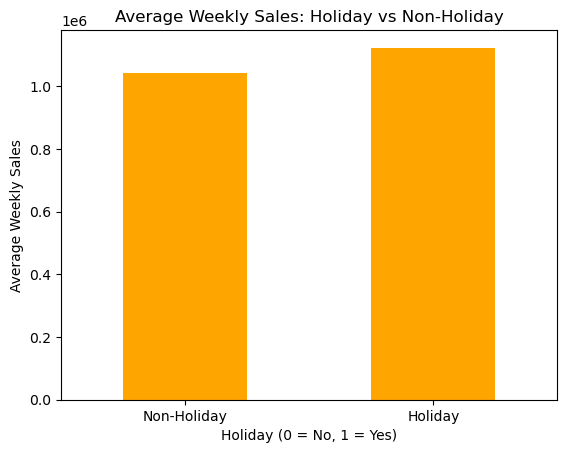

In [35]:
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
holiday_sales.plot(kind='bar', color='orange')
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('Holiday (0 = No, 1 = Yes)')
plt.ylabel('Average Weekly Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()


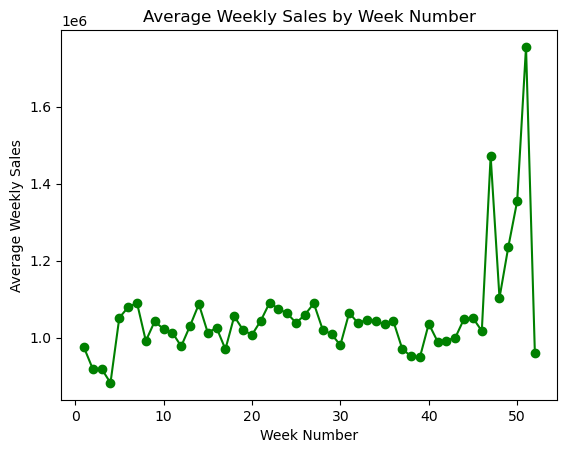

In [36]:
weekly_sales = df.groupby(df['Date'].dt.isocalendar().week)['Weekly_Sales'].mean()
weekly_sales.plot(kind='line', color='green', marker='o')
plt.title('Average Weekly Sales by Week Number')
plt.xlabel('Week Number')
plt.ylabel('Average Weekly Sales')
plt.show()


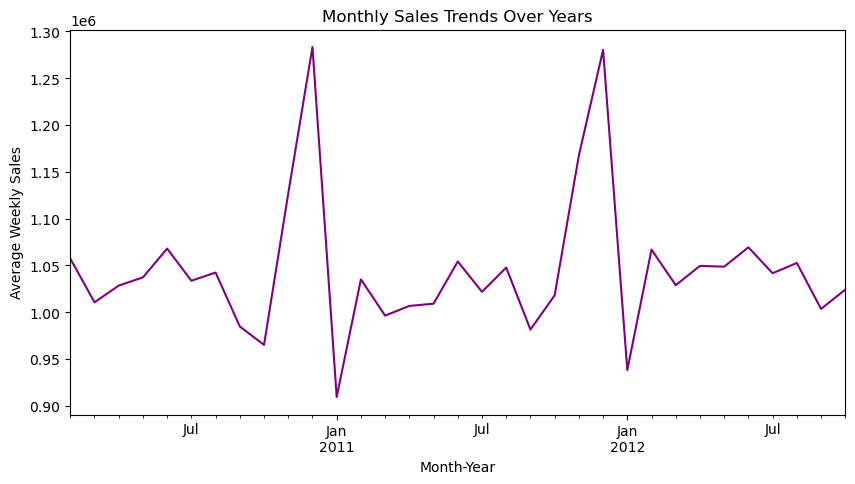

In [37]:
df['Month_Year'] = df['Date'].dt.to_period('M')
monthly_trends = df.groupby('Month_Year')['Weekly_Sales'].mean()
monthly_trends.plot(kind='line', figsize=(10, 5), color='purple')
plt.title('Monthly Sales Trends Over Years')
plt.xlabel('Month-Year')
plt.ylabel('Average Weekly Sales')
plt.show()


Based on the analysis:

Seasonal Trends:

Sales spike during specific months, especially around major holidays like Thanksgiving, Christmas, or New Year.
Lower sales could occur in off-seasons (e.g., post-holiday slumps).
Potential Reasons:

Consumer behavior during festivals and holidays leads to higher spending.
Seasonal products (e.g., summer/winter goods) contribute to variability.
External factors like weather or marketing campaigns (discount seasons) also impact sales.

**TIME SERIES ANALYSIS**

In [23]:
import os
os.getcwd()

'd:\\Data Science\\ML\\Projects\\Walmart TIme Series'

Processing Store 1...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

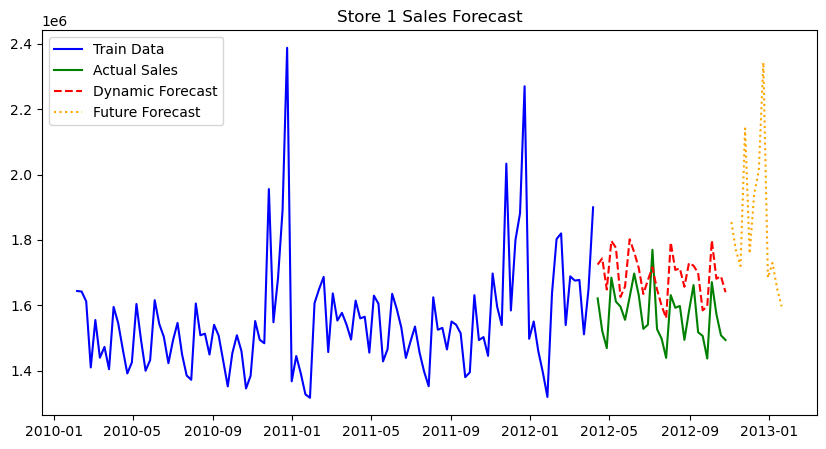

Processing Store 2...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

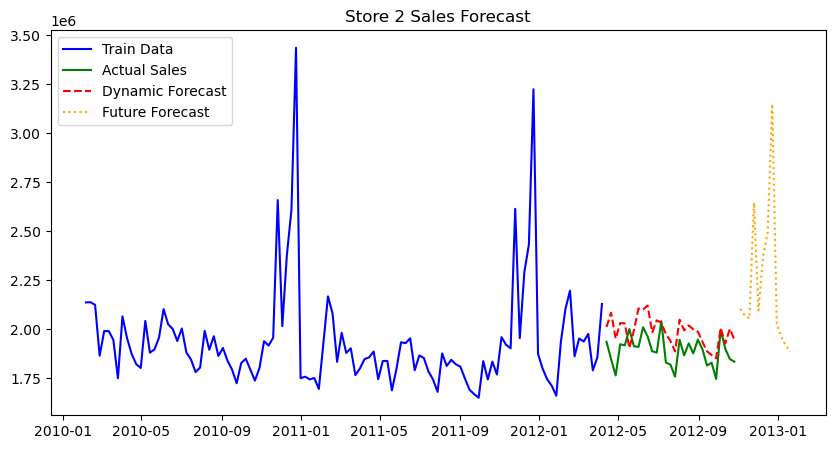

Processing Store 3...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.app

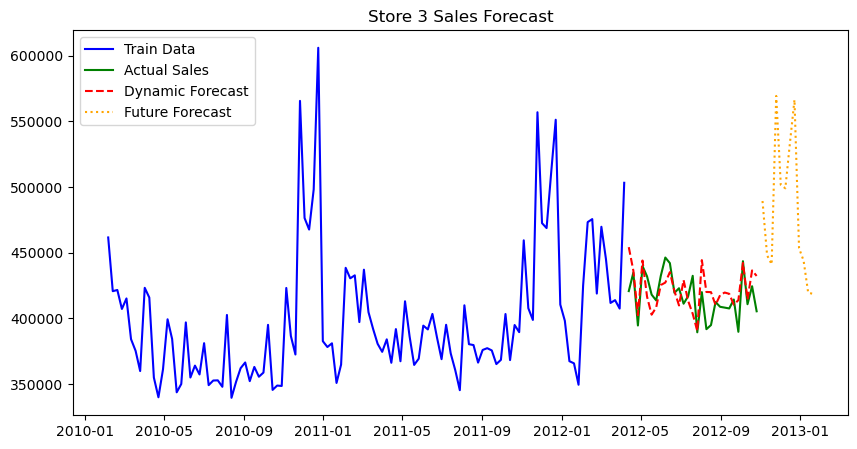

Processing Store 4...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

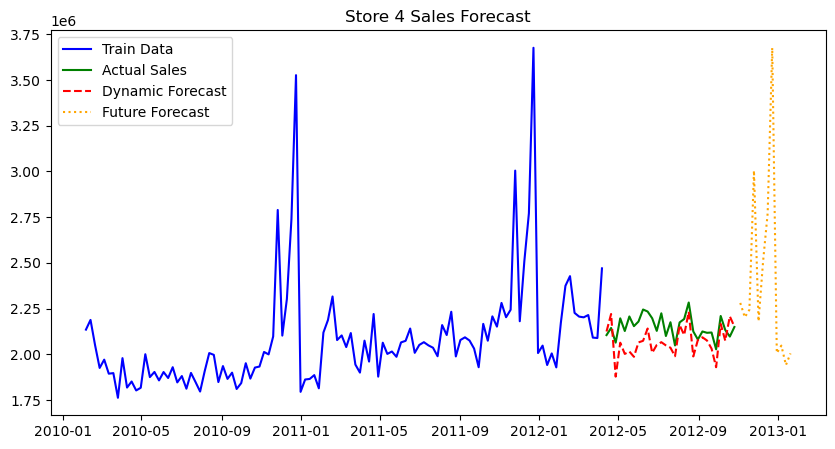

Processing Store 5...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

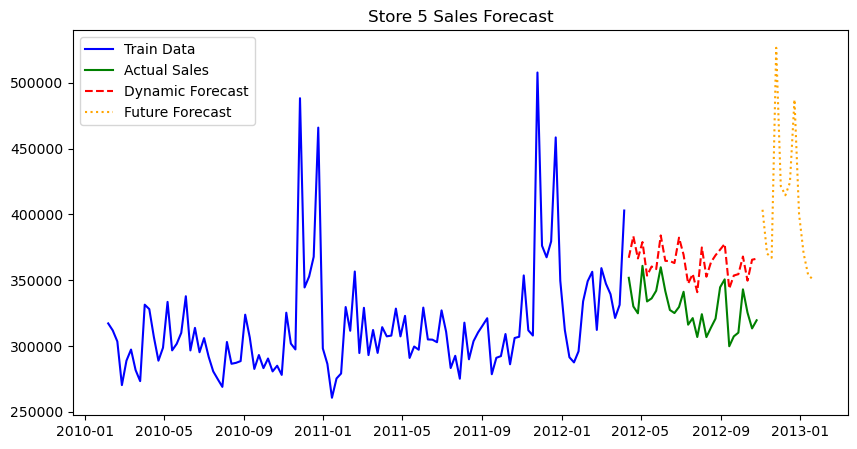

Processing Store 6...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

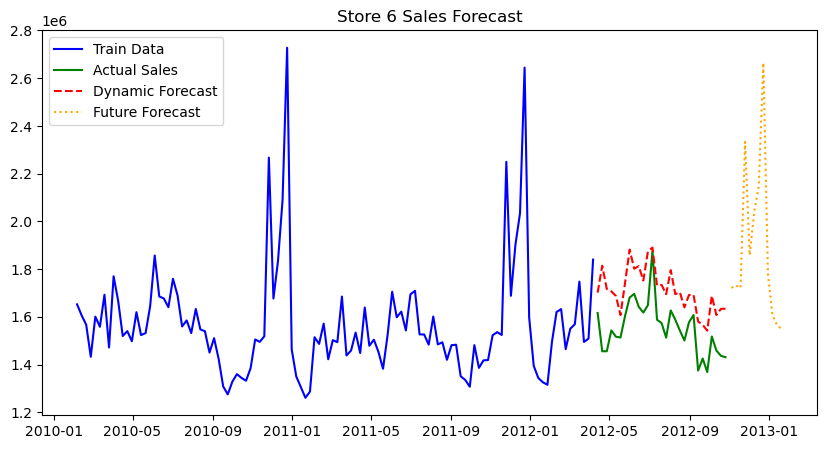

Processing Store 7...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

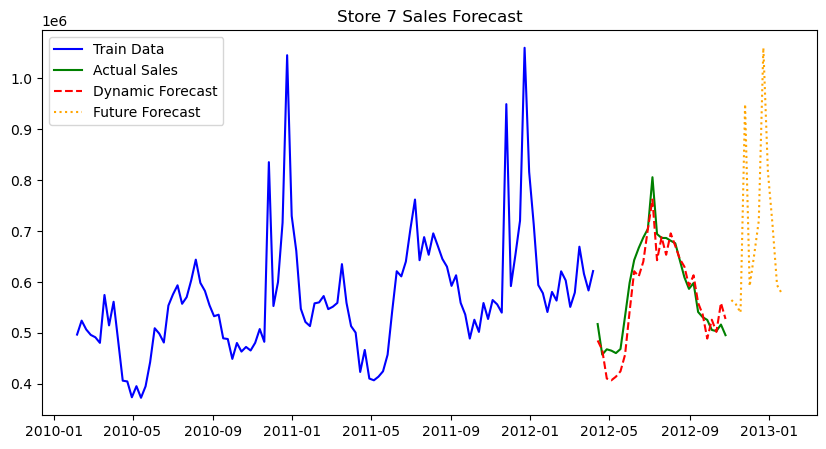

Processing Store 8...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

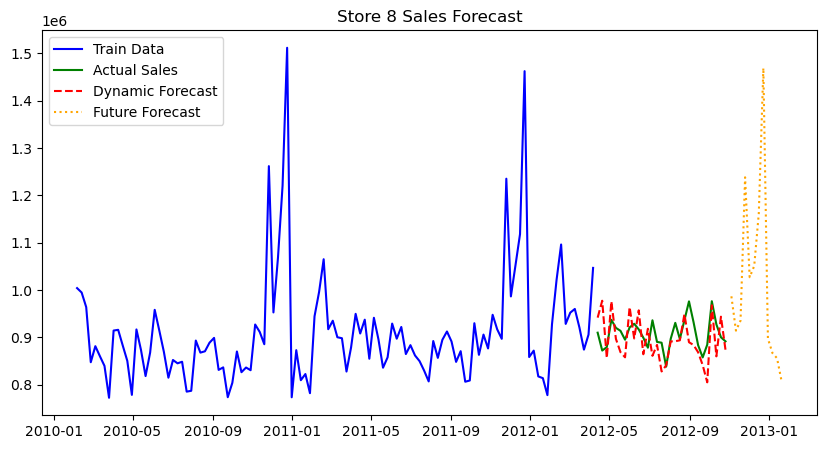

Processing Store 9...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

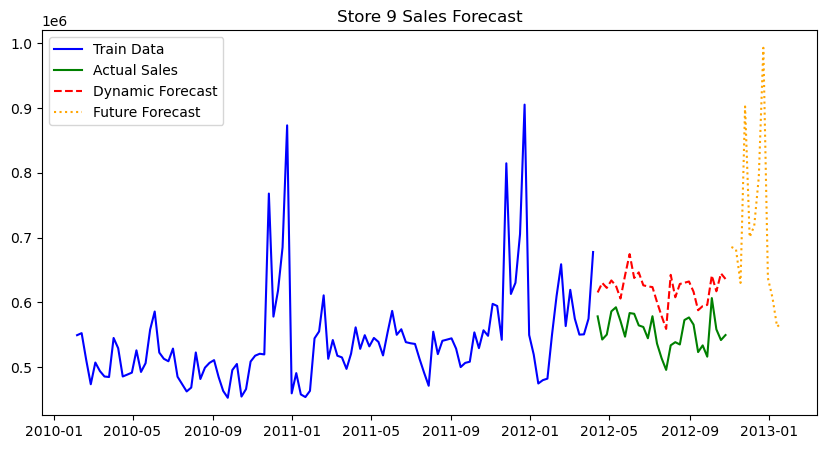

Processing Store 10...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

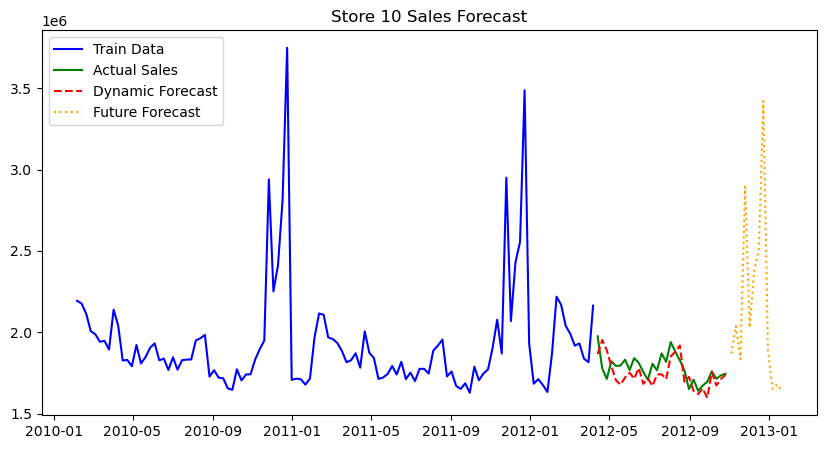

Processing Store 11...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

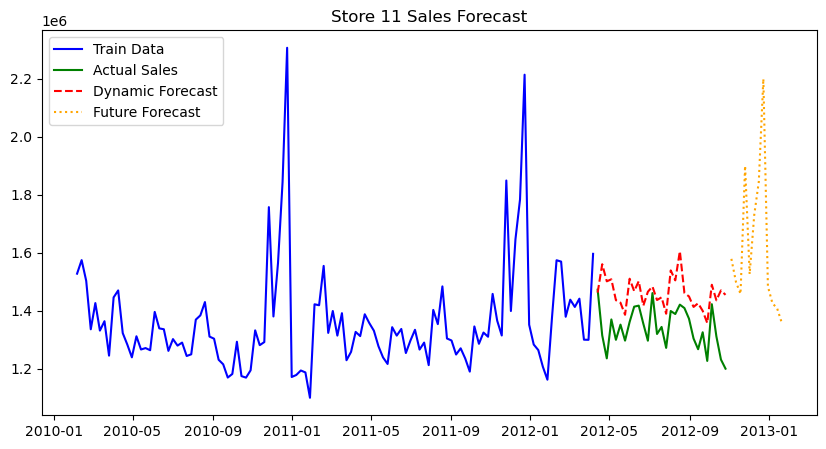

Processing Store 12...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

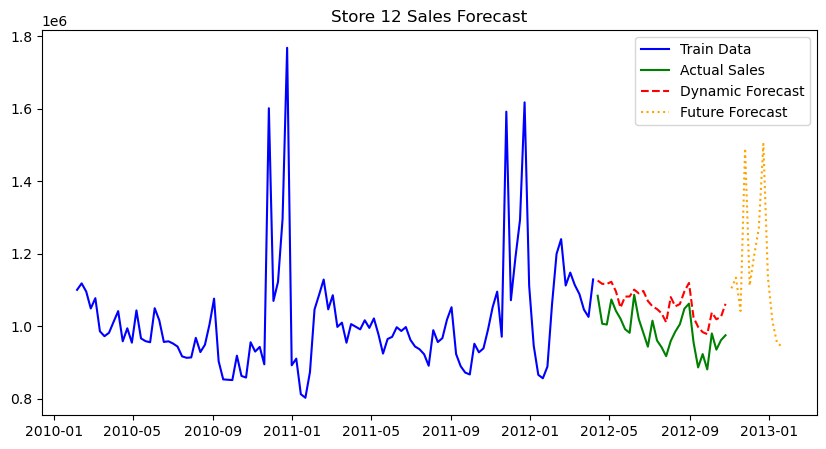

Processing Store 13...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

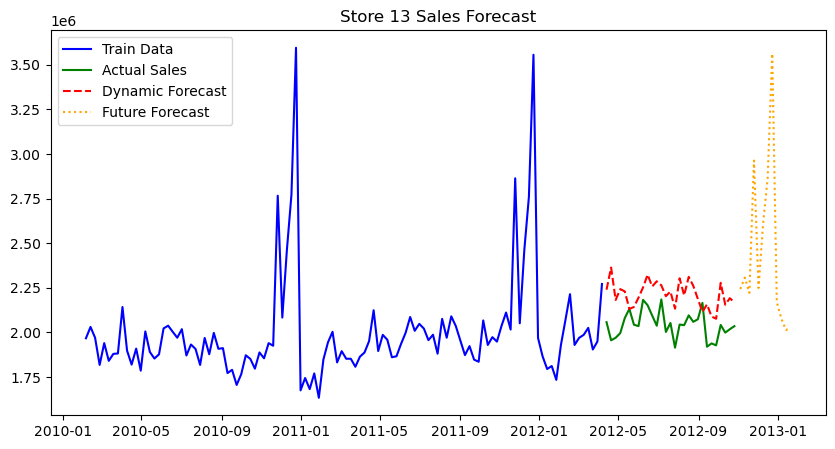

Processing Store 14...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

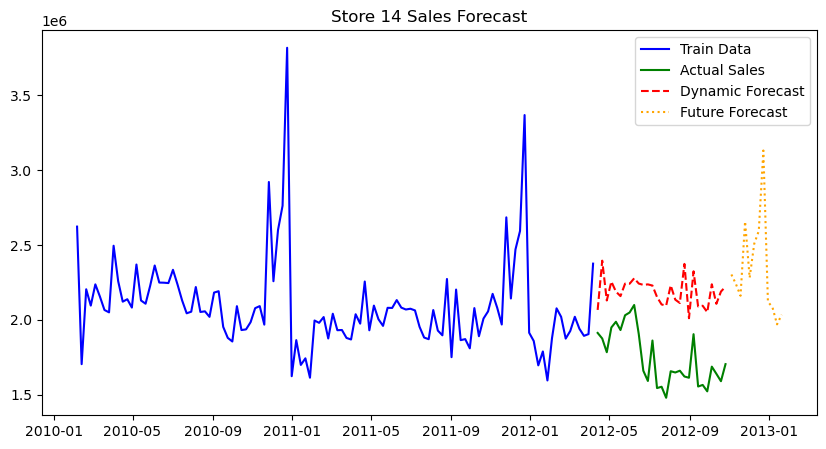

Processing Store 15...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

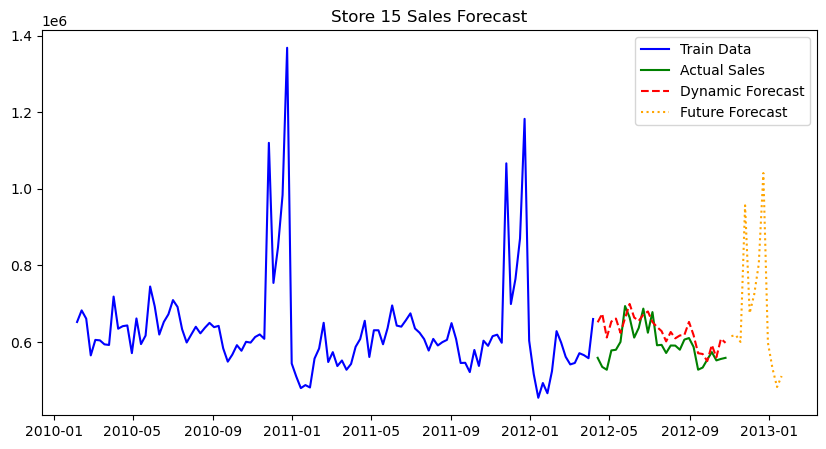

Processing Store 16...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

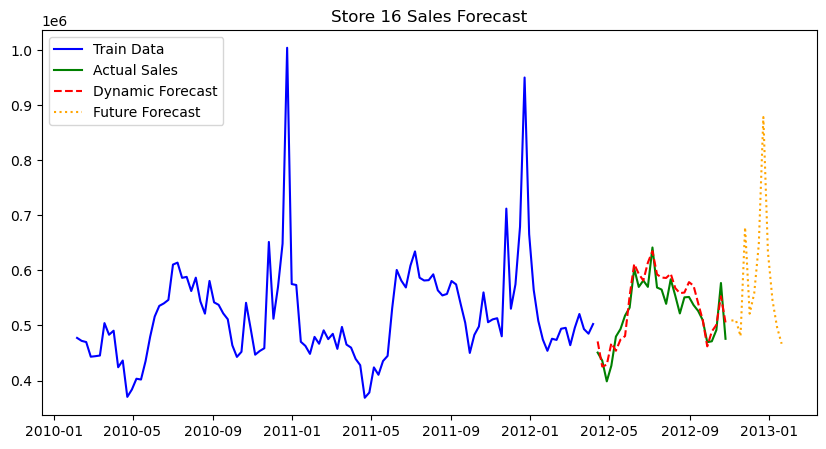

Processing Store 17...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

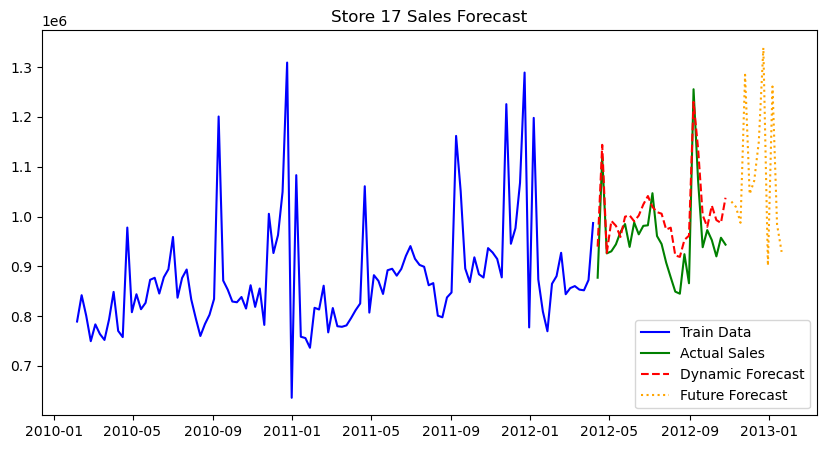

Processing Store 18...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.app

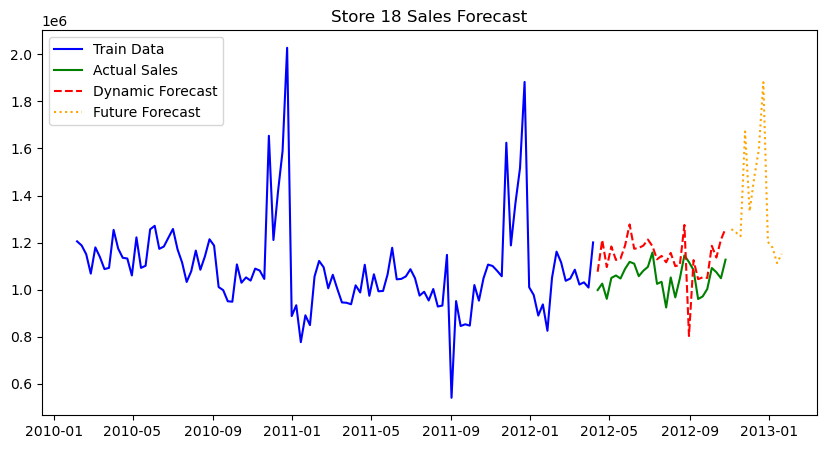

Processing Store 19...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

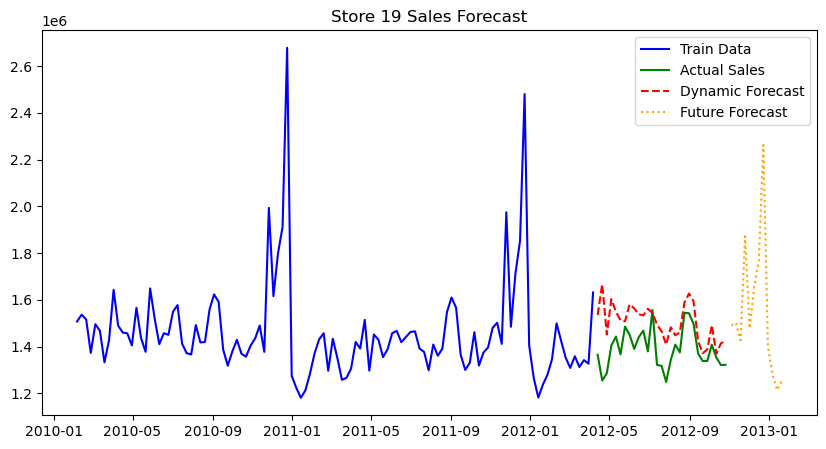

Processing Store 20...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

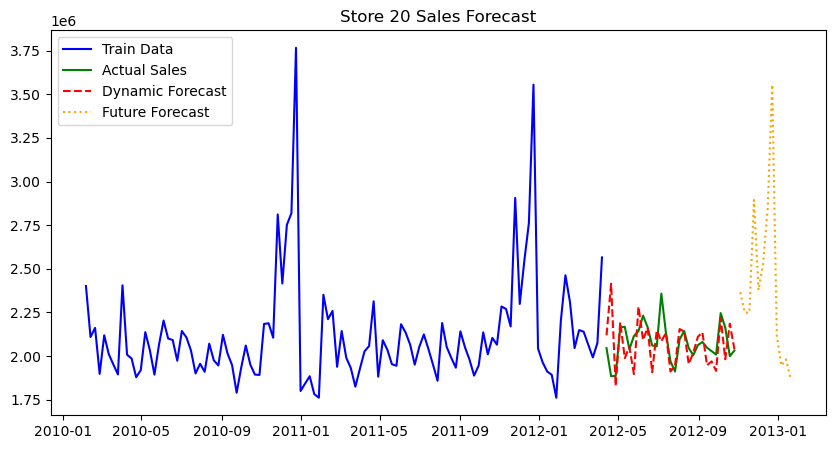

Processing Store 21...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

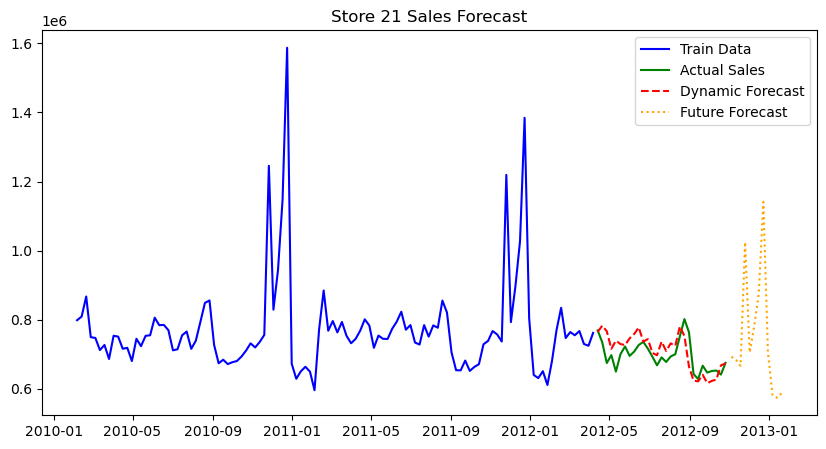

Processing Store 22...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

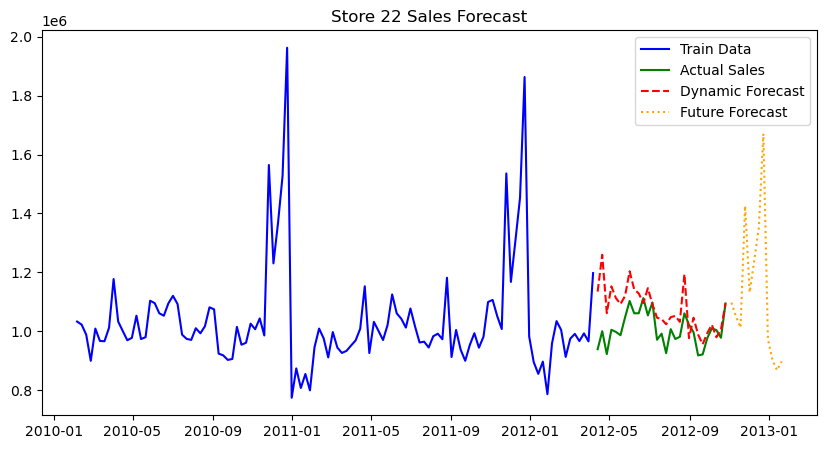

Processing Store 23...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

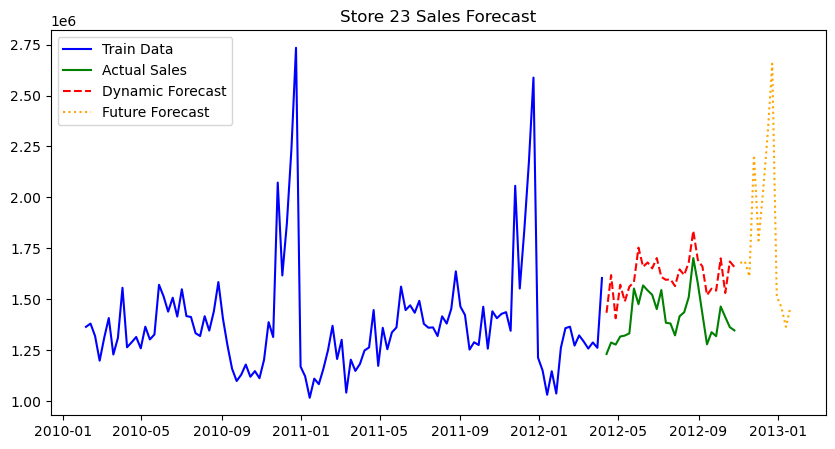

Processing Store 24...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

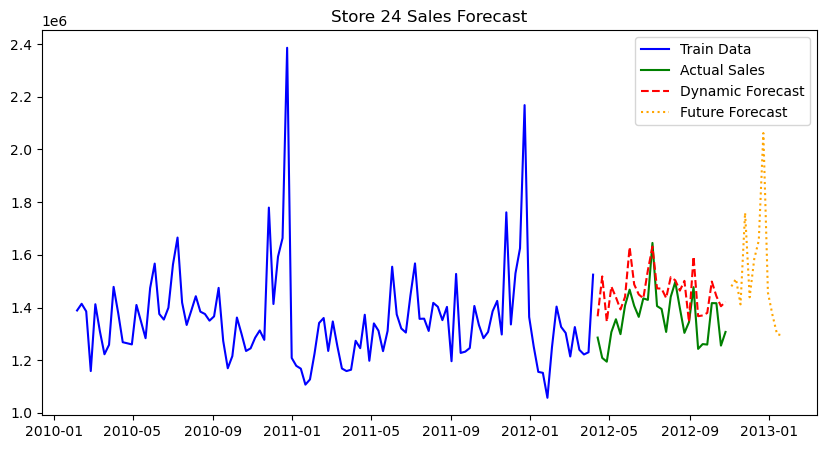

Processing Store 25...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

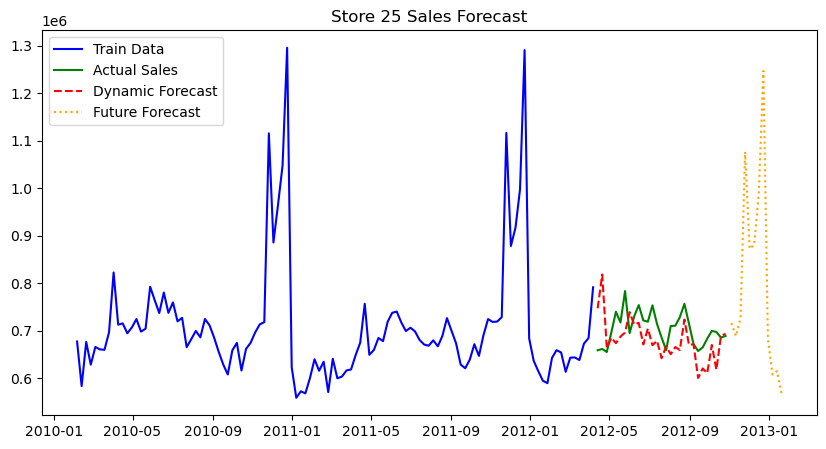

Processing Store 26...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

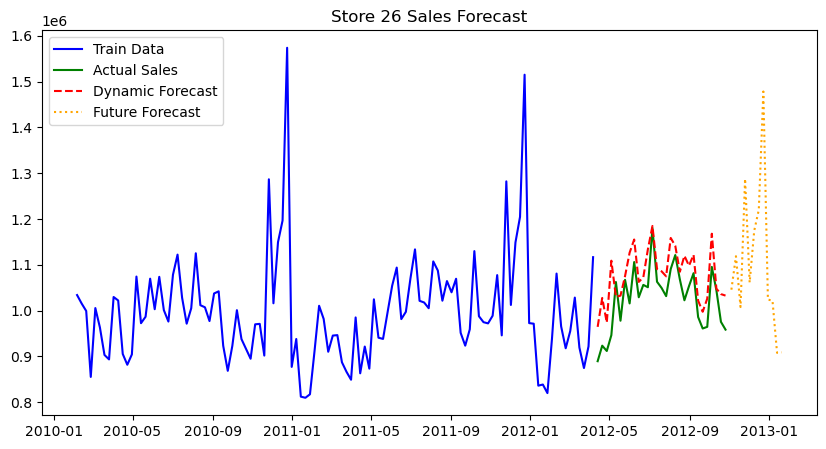

Processing Store 27...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

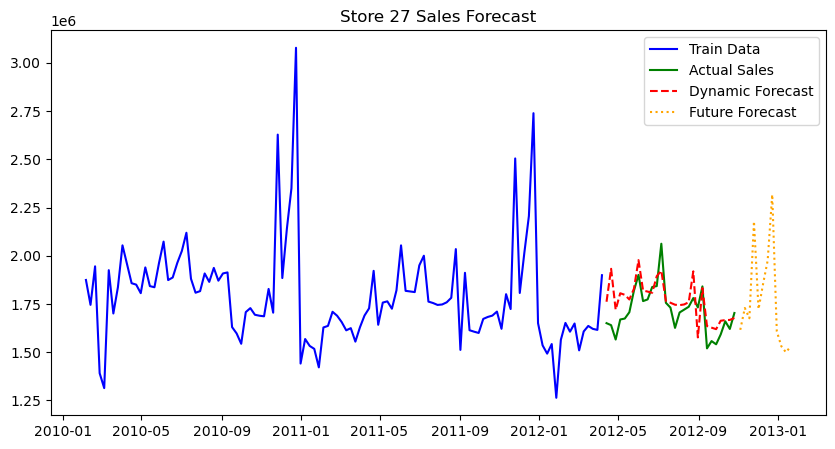

Processing Store 28...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\stat

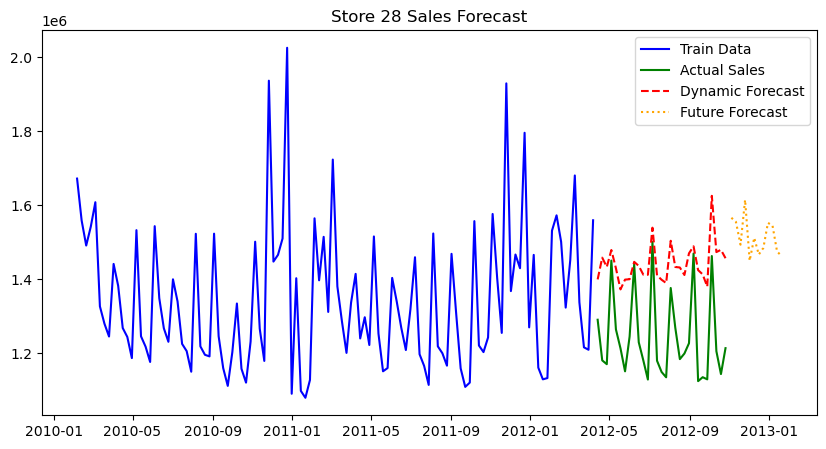

Processing Store 29...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

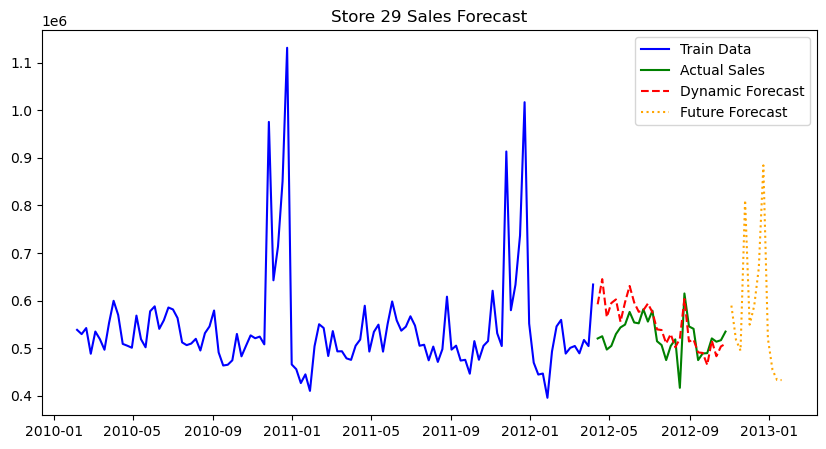

Processing Store 30...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

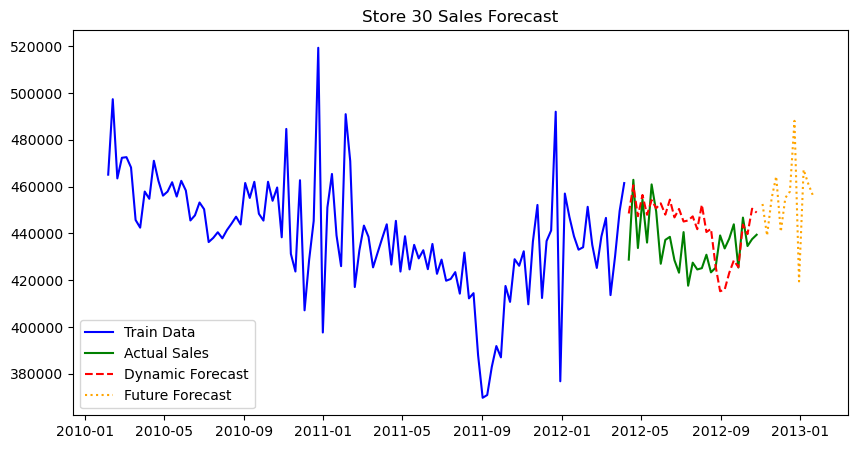

Processing Store 31...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

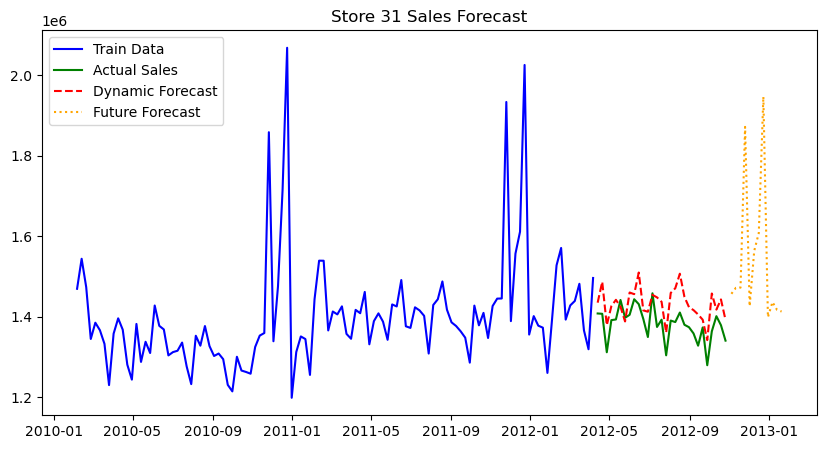

Processing Store 32...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

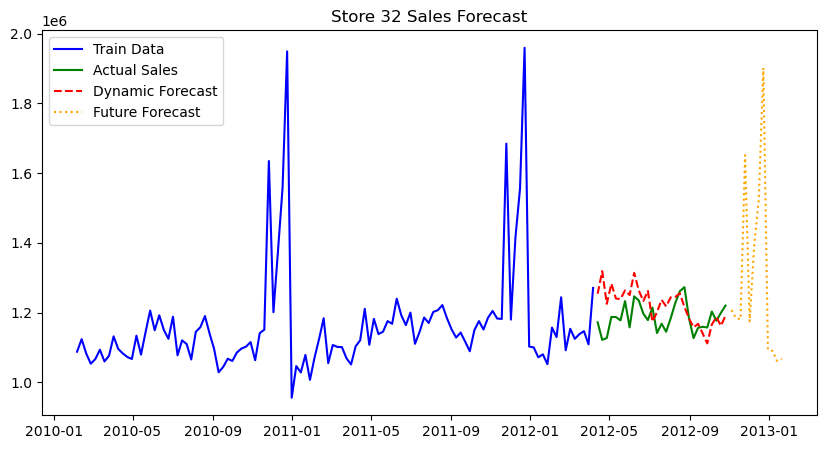

Processing Store 33...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

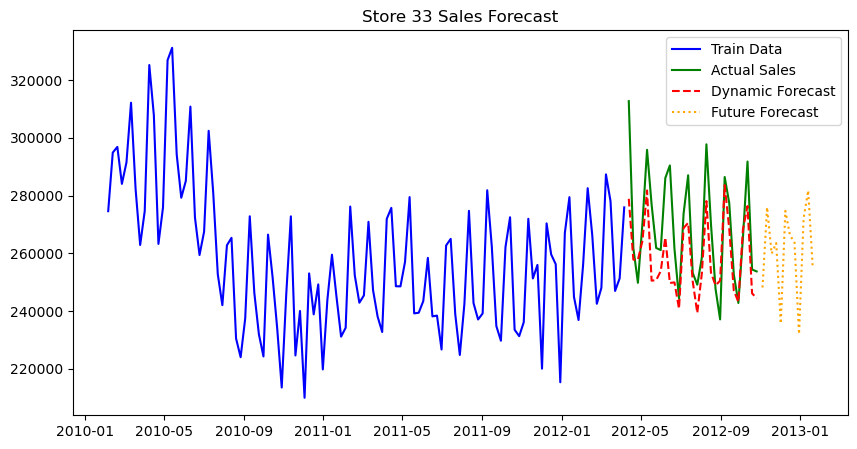

Processing Store 34...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.app

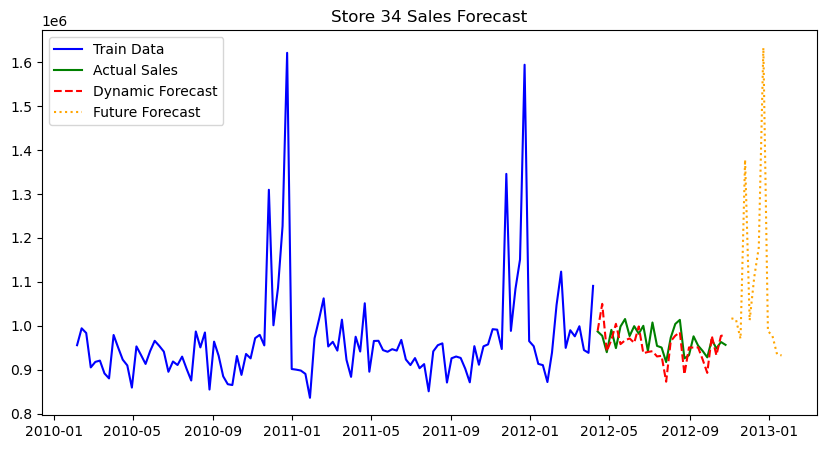

Processing Store 35...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

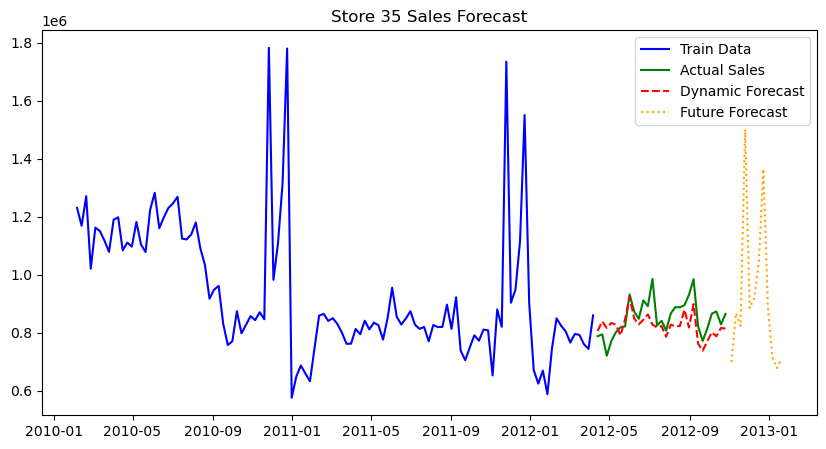

Processing Store 36...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.app

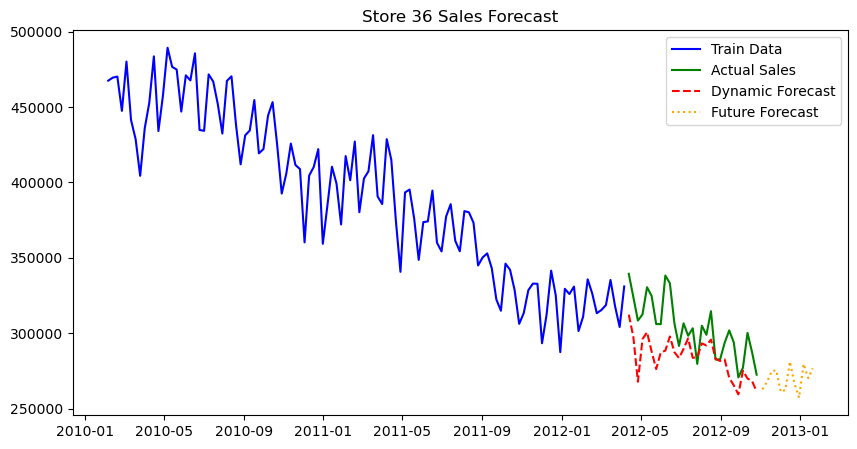

Processing Store 37...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

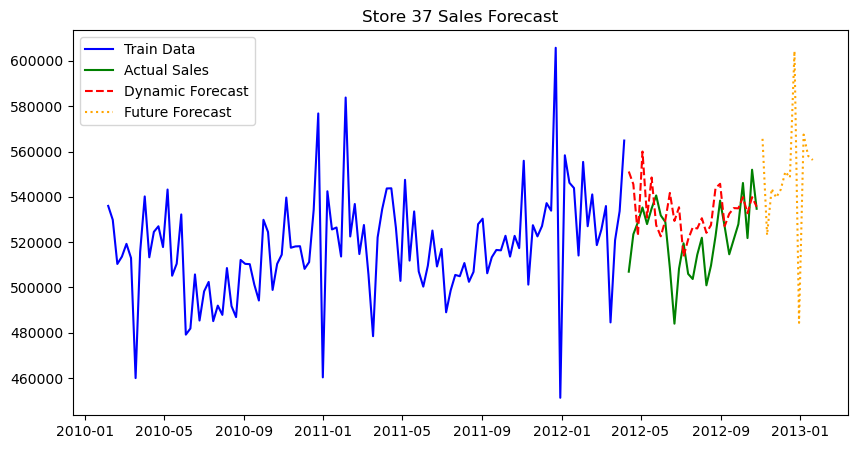

Processing Store 38...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Loc

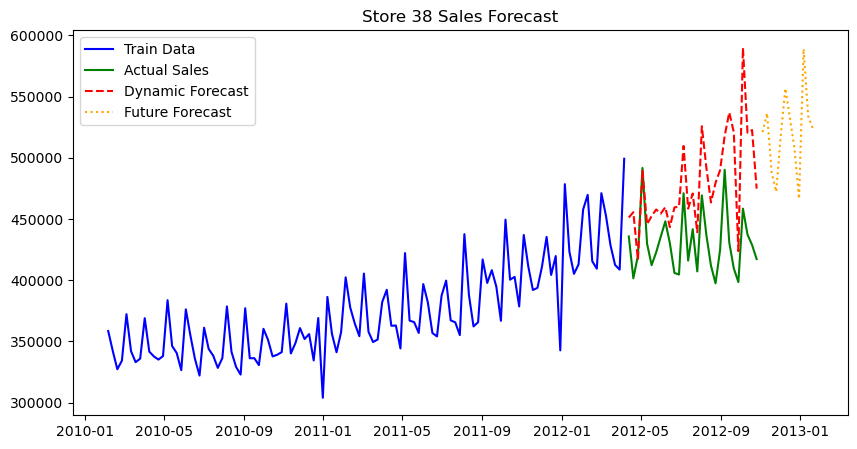

Processing Store 39...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

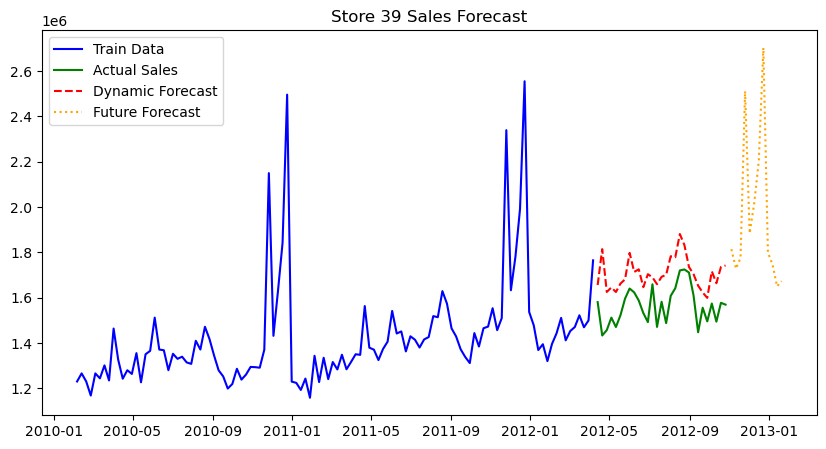

Processing Store 40...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

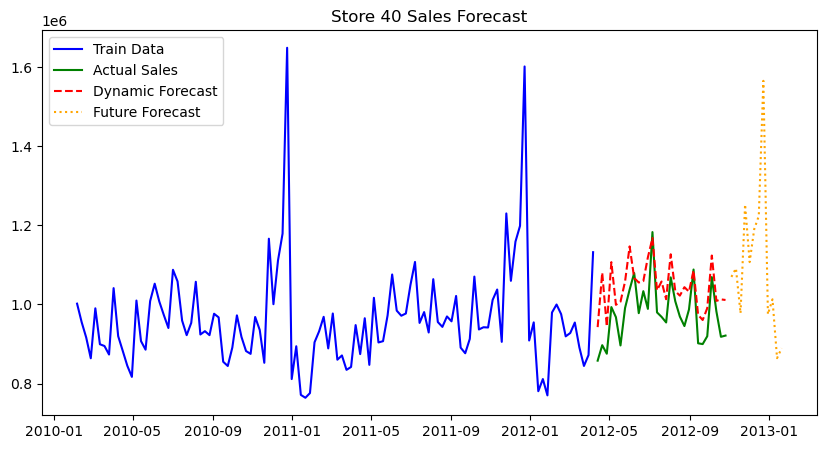

Processing Store 41...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

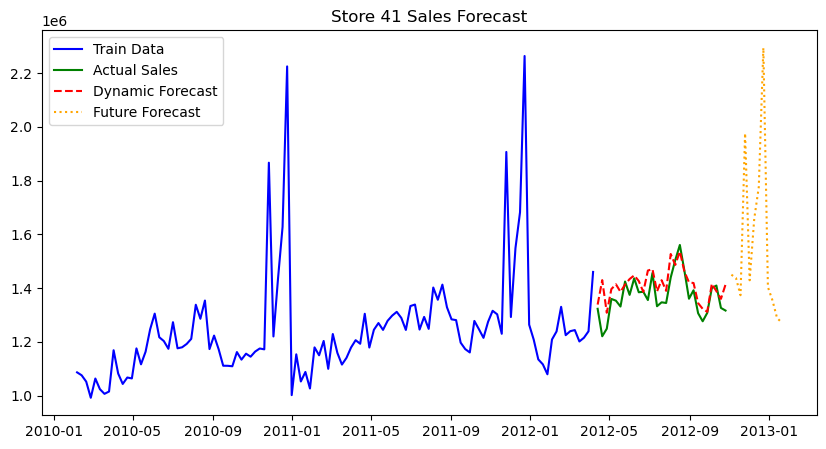

Processing Store 42...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Loc

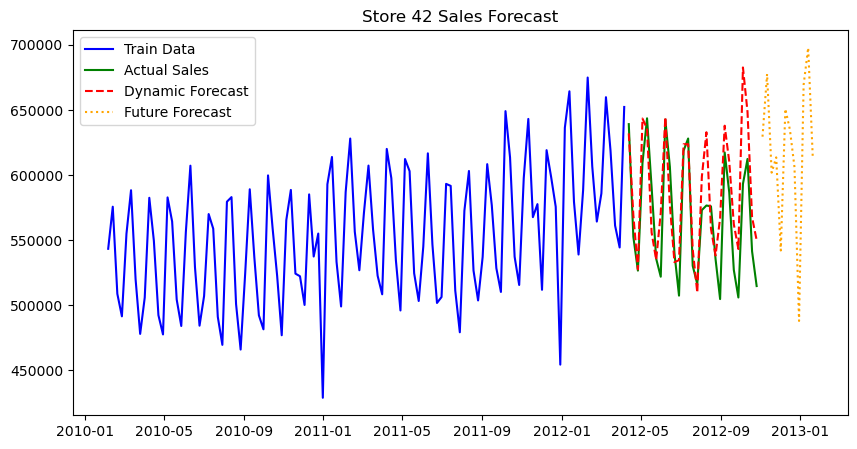

Processing Store 43...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Loc

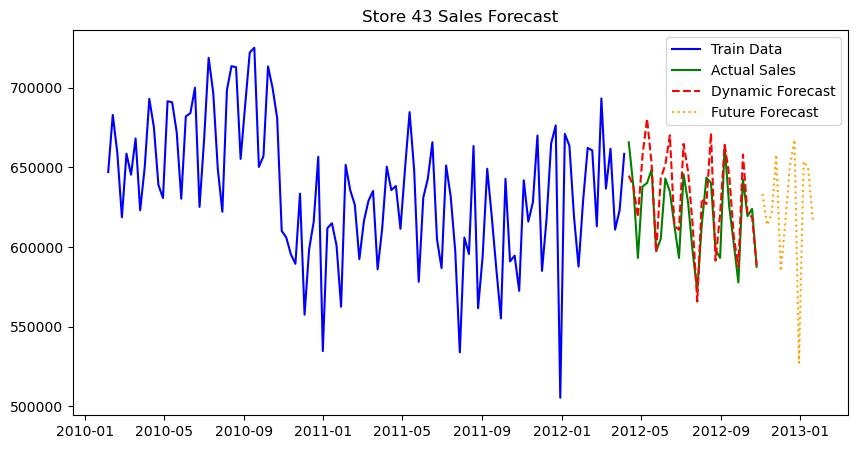

Processing Store 44...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  store_data = store_data.append(pd.DataFrame({
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\ka

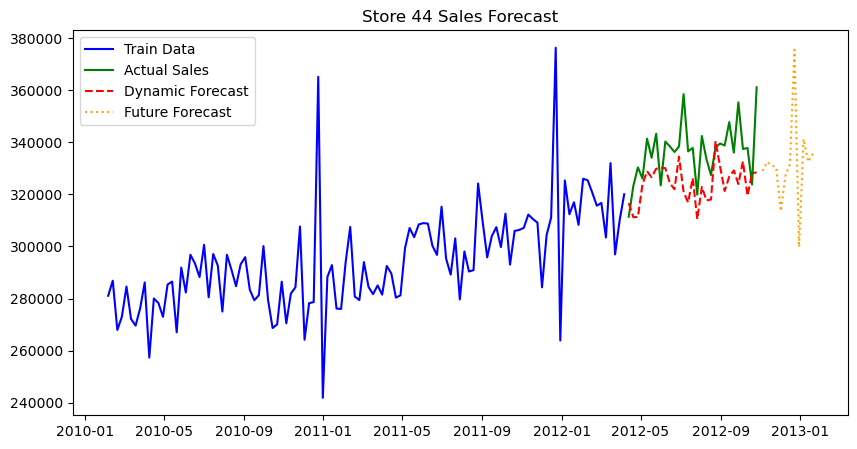

Processing Store 45...


c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\chait\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\chait\AppData\Local\Temp\ipykernel_24628\808605142.py:92: FutureWarning: The frame.app

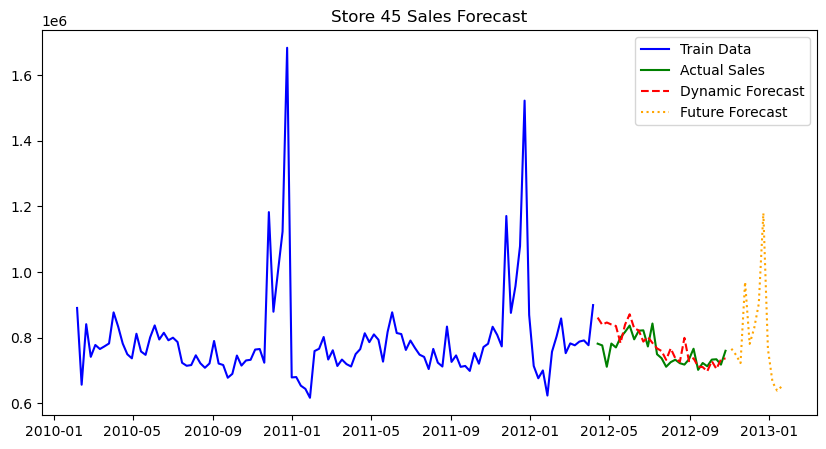

   Store  Train Size  Test Size           RMSE Best Order Seasonal Order
0      1         114         29  132527.741665  (1, 1, 1)  (1, 0, 0, 52)
1      2         114         29  118340.539919  (2, 0, 2)  (1, 0, 0, 52)
2      3         114         29   15916.829288  (5, 0, 3)  (1, 0, 0, 52)
3      4         114         29  109690.540111  (0, 0, 1)  (0, 1, 0, 52)
4      5         114         29   37293.447844  (0, 1, 1)  (1, 0, 0, 52)


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Initialize lists to store results
summary_data = []
forecasts_dict = []
combined_future_forecast = []

# Get list of unique stores
stores = df['Store'].unique()

for store in stores:
    print(f"Processing Store {store}...")

    # Filter data for the current store
    store_data = df[df['Store'] == store].copy()

    # Convert date column to datetime and set as index
    store_data['Date'] = pd.to_datetime(store_data['Date'])
    store_data.set_index('Date', inplace=True)

    # Train-Test split (80-20)
    train_size = int(len(store_data) * 0.8)
    train_data = store_data.iloc[:train_size]
    test_data = store_data.iloc[train_size:]

    # Fit AutoARIMA to find the best model (seasonality = 52 weeks)
    model = pm.auto_arima(
        train_data['Weekly_Sales'],
        seasonal=True,
        m=52,  # Adjust if different seasonality is needed
        stepwise=True,
        trace=False  # Set to True to see model selection process
    )

    # Extract best orders from AutoARIMA
    order = model.order
    seasonal_order = model.seasonal_order

    # Fit SARIMAX model using the best orders
    sarima_model = SARIMAX(
        train_data['Weekly_Sales'],
        order=order,
        seasonal_order=seasonal_order,
        enforce_stationarity=False,
        enforce_invertibility=False
    ).fit(disp=False)

    # Dynamic Forecasting (using predicted values)
    dynamic_start = len(train_data)  # Start from the first test point
    forecast = sarima_model.predict(start=dynamic_start, end=len(store_data) - 1, dynamic=True)

    # Calculate RMSE
    mse = mean_squared_error(test_data['Weekly_Sales'], forecast)
    rmse = np.sqrt(mse)

    # Store summary metrics
    summary_data.append({
        'Store': store,
        'Train Size': len(train_data),
        'Test Size': len(test_data),
        'RMSE': rmse,
        'Best Order': order,
        'Seasonal Order': seasonal_order
    })

    # Store forecasted values
    forecasts_dict.append(pd.DataFrame({
        'Actual Sales': test_data['Weekly_Sales'].values,
        'Predicted Sales': forecast
    }, index=test_data.index))

    # Forecasting for the next 12 weeks dynamically
    future_forecast_dynamic = []
    current_input = store_data['Weekly_Sales'].iloc[-1]  # Use the last observed value to start forecasting

    for _ in range(12):
        # Predict the next week (one-step ahead forecast)
        next_forecast = sarima_model.predict(start=len(store_data), end=len(store_data), dynamic=True)

        # Store the forecasted value
        future_forecast_dynamic.append(next_forecast[0])

        # Update the current input for the next prediction (append the forecasted value)
        store_data = store_data.append(pd.DataFrame({
            'Weekly_Sales': [next_forecast[0]]
        }, index=[store_data.index[-1] + pd.Timedelta(weeks=1)]))

    # Store the dynamic future forecast results
    future_dates_dynamic = pd.date_range(start=store_data.index[-12], periods=12, freq='W')
    future_forecast_dynamic_df = pd.DataFrame({
        'Store': [store] * 12,  # Add store name as a column
        'Predicted Sales': future_forecast_dynamic
    }, index=future_dates_dynamic)

    # Append this store's forecast to the combined future forecast table
    combined_future_forecast.append(future_forecast_dynamic_df)

    # Plot actual vs predicted sales and future forecast
    plt.figure(figsize=(10, 5))
    plt.plot(train_data.index, train_data['Weekly_Sales'], label="Train Data", color='blue')
    plt.plot(test_data.index, test_data['Weekly_Sales'], label="Actual Sales", color='green')
    plt.plot(test_data.index, forecast, label="Dynamic Forecast", color='red', linestyle='dashed')
    plt.plot(future_forecast_dynamic_df.index, future_forecast_dynamic_df['Predicted Sales'], label="Future Forecast", color='orange', linestyle='dotted')
    plt.title(f"Store {store} Sales Forecast")
    plt.legend()
    plt.show()

# Convert summary data to a DataFrame
summary_df = pd.DataFrame(summary_data)

# Convert combined future forecast to a single DataFrame
combined_future_forecast_df = pd.concat(combined_future_forecast)

# Save summary and combined future forecast to CSV
summary_df.to_csv('sales_forecasting_summary_dynamic.csv', index=False)
combined_future_forecast_df.to_csv('combined_future_forecast_dynamic.csv', index=False)

# Preview summary
print(summary_df.head())


In [27]:
#the order coloumn folows the ARIMA model order (p,d,q) and seasonal order (P,D,Q,S)
summary_df

Store  Train Size  Test Size           RMSE Best Order Seasonal Order
0       1         114         29  132527.741665  (1, 1, 1)  (1, 0, 0, 52)
1       2         114         29  118340.539919  (2, 0, 2)  (1, 0, 0, 52)
2       3         114         29   15916.829288  (5, 0, 3)  (1, 0, 0, 52)
3       4         114         29  109690.540111  (0, 0, 1)  (0, 1, 0, 52)
4       5         114         29   37293.447844  (0, 1, 1)  (1, 0, 0, 52)
5       6         114         29  170715.780590  (2, 0, 2)  (1, 0, 0, 52)
6       7         114         29   36231.953714  (0, 0, 1)  (0, 1, 0, 52)
7       8         114         29   45420.050030  (2, 0, 2)  (1, 0, 0, 52)
8       9         114         29   69956.736475  (2, 1, 1)  (0, 1, 0, 52)
9      10         114         29   87425.075575  (2, 0, 2)  (1, 0, 0, 52)
10     11         114         29  139118.027461  (2, 0, 2)  (1, 0, 0, 52)
11     12         114         29   81495.042488  (2, 0, 2)  (1, 0, 0, 52)
12     13         114         29  189312.090960  (2, 0, 2)  (1, 0, 0, 52)
13     14         114         29  470760.325995  (2, 0, 2)  (1, 0, 0, 52)
14     15         114         29   50983.419942  (2, 0, 2)  (1, 0, 0, 52)
15     16         114         29   24696.256658  (2, 0, 2)  (1, 0, 0, 52)
16     17         114         29   56120.979716  (1, 1, 1)  (1, 0, 0, 52)
17     18         114         29  124355.906855  (4, 0, 2)  (1, 0, 0, 52)
18     19         114         29  137735.153753  (2, 0, 2)  (1, 0, 0, 52)
19     20         114         29  147309.221887  (2, 0, 2)  (1, 0, 0, 52)
20     21         114         29   42313.136423  (1, 0, 2)  (1, 0, 0, 52)
21     22         114         29   95505.883961  (2, 0, 2)  (1, 0, 0, 52)
22     23         114         29  209805.658742  (2, 0, 2)  (1, 0, 0, 52)
23     24         114         29  117255.102008  (2, 0, 2)  (1, 0, 0, 52)
24     25         114         29   56682.214759  (2, 0, 2)  (1, 0, 0, 52)
25     26         114         29   63527.340571  (2, 0, 2)  (1, 0, 0, 52)
26     27         114         29   99471.519094  (2, 0, 2)  (1, 0, 0, 52)
27     28         114         29  216996.541906  (2, 0, 2)  (1, 0, 1, 52)
28     29         114         29   47474.599545  (2, 0, 2)  (1, 0, 0, 52)
29     30         114         29   15726.535424  (1, 1, 0)  (1, 0, 0, 52)
30     31         114         29   58129.851255  (1, 1, 1)  (1, 0, 0, 52)
31     32         114         29   65330.278489  (2, 0, 2)  (1, 0, 0, 52)
32     33         114         29   14814.339811  (0, 1, 0)  (1, 0, 0, 52)
33     34         114         29   33304.756356  (2, 0, 2)  (1, 0, 0, 52)
34     35         114         29   58723.084494  (1, 1, 1)  (1, 0, 0, 52)
35     36         114         29   23272.199178  (2, 1, 3)  (2, 0, 0, 52)
36     37         114         29   19160.104112  (1, 1, 0)  (1, 0, 0, 52)
37     38         114         29   58523.770164  (0, 1, 0)  (0, 1, 1, 52)
38     39         114         29  156247.526772  (4, 1, 0)  (1, 0, 0, 52)
39     40         114         29   78729.301420  (2, 0, 2)  (1, 0, 0, 52)
40     41         114         29   62356.062990  (4, 1, 0)  (1, 0, 0, 52)
41     42         114         29   32112.600440  (0, 1, 0)  (0, 1, 1, 52)
42     43         114         29   18897.160426  (0, 1, 0)  (0, 1, 1, 52)
43     44         114         29   16123.459387  (1, 1, 0)  (1, 0, 0, 52)
44     45         114         29   44484.011301  (2, 0, 2)  (1, 0, 0, 52)

In [26]:
combined_future_forecast_df

Store  Predicted Sales
2012-11-04      1     1.854755e+06
2012-11-11      1     1.767575e+06
2012-11-18      1     1.720311e+06
2012-11-25      1     2.141198e+06
2012-12-02      1     1.758323e+06
...           ...              ...
2012-12-23     45     1.179312e+06
2012-12-30     45     7.658790e+05
2013-01-06     45     6.653805e+05
2013-01-13     45     6.390821e+05
2013-01-20     45     6.513566e+05

[540 rows x 2 columns]